In [ ]:
%reset

In [1]:
# Python code used to do the postprocessing for outputs from modified DALES 4.2 with 2 decaying scalars introduced
# Better use with resolution 512*512*200 with equidistant vertical grid.
# Nonequidistant vertical grid will result in a bad look and maybe a wrong output.
# Author :: Jiachen Lu SRAF UC San Diego 2019.3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from netCDF4 import Dataset
import numpy as np
import scipy.stats as st
from scipy.stats import kde
import numpy, scipy.io
import time
from scipy.interpolate import interp1d
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colorbar, colors
from matplotlib import ticker
from matplotlib import cm
from matplotlib import rc
import matplotlib.gridspec as gridspec
from numpy.fft import fftn
import itertools
import scipy.io as sio
import matplotlib.style
from mpl_toolkits.mplot3d import Axes3D
import IPython
import platform
horse = IPython.display.Audio(url="http://www.w3schools.com/html/horse.ogg",autoplay=True) # To play a sound after a long run
if (platform.system() == 'Linux'): # Read raw results from Linux machine
    fig_dir =    '/home/jiachen/storage/32/Figures/' # Figure output
    aim_dir =    '/home/jiachen/storage/32/' # Read raw ncdf file from there
    aim_dir_20 = '/home/jiachen/storage/32/'
if (platform.system() == 'Darwin'): # Read raw results from Mac machine
    fig_dir =    '/Users/jiachenlu/Thesis/Figures/' # Figure output
    aim_dir =    '/Users/jiachenlu/26/' # Read raw ncdf file from there
    aim_dir_20 = '/Users/jiachenlu/26/20/'
if (platform.system() == 'Windows'): # I'm not using Windows
    print('Do not use windows')
#if (sys.platform == 'darwin'):
# read for 8/19/36th hour for field results. and try to give a reason for the S_{FT}. 

In [2]:
# Define functions and colormaps
# Import 'Parula' colormap looks like in MATLAB
cm_data = [[0.2081, 0.1663, 0.5292], [0.2116238095, 0.1897809524, 0.5776761905], 
 [0.212252381, 0.2137714286, 0.6269714286], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
test_cm = parula_map
#plt.imshow(np.linspace(0, 100, 256)[None, :], aspect='auto',cmap=parula_map)
#plt.show()

# To use the colormap 'ssec','cmap_3gauss' from ncview in python
cmap_ssec = [
      0,0,45, 0,1,46, 0,2,47, 0,3,48, 0,5,49, 0,6,50, 0,7,51, 0,9,52, 
      0,10,53, 0,11,54, 0,13,55, 0,14,56, 0,15,57, 0,17,58, 0,18,59, 0,19,60, 
      0,21,62, 0,22,63, 0,23,64, 0,25,65, 0,26,66, 0,27,67, 0,29,68, 0,30,69, 
      0,31,70, 0,33,71, 0,34,72, 0,35,73, 0,37,74, 0,38,75, 0,39,76, 0,40,77, 
      0,42,79, 0,43,80, 0,44,81, 0,46,82, 0,47,83, 0,48,84, 0,50,85, 0,51,86, 
      0,52,87, 0,54,88, 0,55,89, 0,56,90, 0,58,91, 0,59,92, 0,60,93, 0,62,94, 
      0,63,96, 0,64,97, 0,66,98, 0,67,99, 0,68,100, 0,70,101, 0,71,102, 0,72,103, 
      0,74,104, 0,75,105, 0,76,106, 0,77,107, 0,79,108, 0,80,109, 0,81,110, 0,83,111, 
      0,84,113, 0,85,114, 0,87,115, 0,88,116, 0,89,117, 0,91,118, 0,92,119, 0,93,120, 
      0,95,121, 0,96,122, 0,97,123, 0,99,124, 0,100,125, 0,101,126, 0,103,127, 0,104,128, 
      0,105,130, 0,107,131, 0,108,132, 0,109,133, 0,111,134, 0,112,135, 0,113,136, 0,114,137, 
      0,116,138, 0,117,139, 0,118,140, 0,120,141, 0,121,142, 0,122,143, 0,124,144, 0,125,145, 
      0,126,147, 0,128,148, 0,129,149, 0,130,150, 0,132,151, 0,133,152, 0,134,153, 0,136,154, 
      0,137,155, 0,138,156, 0,140,157, 0,141,158, 0,142,159, 0,144,160, 0,145,161, 0,146,162, 
      0,148,164, 0,149,165, 0,150,166, 0,151,167, 0,153,168, 0,154,169, 0,155,170, 0,157,171, 
      0,158,172, 0,159,173, 0,161,174, 0,162,175, 0,163,176, 0,165,177, 0,166,178, 0,167,180, 
      0,169,181, 0,170,182, 0,171,183, 0,173,184, 0,174,185, 0,175,186, 0,177,187, 0,178,188, 
      0,179,189, 0,181,190, 0,182,191, 0,183,192, 0,185,193, 0,186,194, 0,187,195, 0,188,197, 
      0,190,198, 0,191,199, 0,192,200, 0,194,201, 0,195,202, 0,196,203, 0,198,204, 0,199,205, 
      0,200,206, 0,202,207, 0,203,208, 0,204,209, 0,206,210, 0,207,211, 0,208,212, 0,210,214, 
      0,211,215, 0,212,216, 0,214,217, 0,215,218, 0,216,219, 0,218,220, 0,219,221, 0,220,222, 
      0,222,223, 0,223,224, 0,224,225, 0,225,226, 0,227,227, 0,228,228, 0,229,229, 8,230,222, 
      17,231,214, 26,232,206, 34,233,198, 43,234,190, 52,235,182, 61,236,174, 70,236,166, 78,237,158, 
      87,238,150, 96,239,143, 105,240,135, 114,241,127, 122,242,119, 131,242,111, 140,243,103, 149,244,95, 
      157,245,87, 166,246,79, 175,247,71, 184,248,63, 193,248,55, 201,249,47, 210,250,39, 219,251,32, 
      228,252,24, 237,253,16, 245,254,8, 254,254,0, 255,250,0, 255,245,0, 255,240,0, 255,236,0, 
      255,231,0, 255,226,0, 255,221,0, 255,217,0, 255,212,0, 255,207,0, 255,202,0, 255,198,0, 
      255,193,0, 255,188,0, 255,183,0, 255,179,0, 255,174,0, 255,169,0, 255,164,0, 255,160,0, 
      255,155,0, 255,150,0, 255,145,0, 255,141,0, 255,136,0, 255,131,0, 255,126,0, 255,122,0, 
      253,117,0, 249,113,0, 246,109,0, 242,105,0, 239,101,0, 236,97,0, 232,93,0, 229,89,0, 
      225,85,0, 222,81,0, 219,77,0, 215,73,0, 212,69,0, 208,65,0, 205,61,0, 202,57,0, 
      198,53,0, 195,49,0, 191,45,0, 188,41,0, 185,37,0, 181,33,0, 178,29,0, 175,24,0]; 
cmap_3gauss = [
0,0,255, 0,0,255, 1,2,254, 2,4,253, 3,6,252, 4,9,251, 5,12,250, 6,16,249, 
7,21,248, 8,26,247, 9,32,246, 10,39,245, 11,46,244, 12,53,243, 13,61,242, 14,69,241, 
15,78,240, 16,87,239, 17,96,238, 18,105,237, 19,114,236, 20,123,235, 21,133,234, 22,142,233, 
23,151,232, 24,160,231, 25,169,230, 26,178,229, 27,186,228, 28,194,227, 29,202,226, 30,209,225, 
31,216,224, 32,223,223, 33,229,222, 34,234,221, 35,239,220, 36,243,219, 37,246,218, 38,249,217, 
39,251,216, 40,253,215, 41,253,214, 42,253,213, 43,253,212, 44,252,211, 45,250,210, 46,247,209, 
47,244,208, 48,240,207, 49,235,206, 50,230,205, 51,225,204, 52,218,203, 53,212,202, 54,205,201, 
55,197,200, 56,189,199, 57,181,198, 58,172,197, 59,163,196, 60,154,195, 61,145,194, 62,136,193, 
63,127,192, 64,117,191, 65,108,190, 66,99,189, 67,90,188, 68,81,187, 69,72,186, 70,64,185, 
71,56,184, 72,48,183, 73,41,182, 74,35,181, 75,28,180, 76,23,179, 77,18,178, 78,13,177, 
79,9,176, 80,6,175, 81,3,174, 82,1,173, 83,0,172, 84,0,171, 85,0,170, 86,0,169, 
87,2,168, 88,4,167, 89,7,166, 90,10,165, 91,14,164, 92,19,163, 93,24,162, 94,30,161, 
95,37,160, 96,44,159, 97,51,158, 98,59,157, 99,67,156, 100,75,155, 101,84,154, 102,93,153, 
103,102,152, 104,111,151, 105,120,150, 106,130,149, 107,139,148, 108,148,147, 109,157,146, 110,166,145, 
111,175,144, 112,184,143, 113,192,142, 114,200,141, 115,207,140, 116,214,139, 117,221,138, 118,227,137, 
119,232,136, 120,237,135, 121,241,134, 122,245,133, 123,248,132, 124,250,131, 125,252,130, 126,253,129, 
127,254,128, 128,253,127, 129,252,126, 130,250,125, 131,248,124, 132,245,123, 133,241,122, 134,237,121, 
135,232,120, 136,227,119, 137,221,118, 138,214,117, 139,207,116, 140,200,115, 141,192,114, 142,184,113, 
143,175,112, 144,166,111, 145,157,110, 146,148,109, 147,139,108, 148,130,107, 149,120,106, 150,111,105, 
151,102,104, 152,93,103, 153,84,102, 154,75,101, 155,67,100, 156,59,99, 157,51,98, 158,44,97, 
159,37,96, 160,30,95, 161,24,94, 162,19,93, 163,14,92, 164,10,91, 165,7,90, 166,4,89, 
167,2,88, 168,0,87, 169,0,86, 170,0,85, 171,0,84, 172,1,83, 173,3,82, 174,6,81, 
175,9,80, 176,13,79, 177,18,78, 178,23,77, 179,28,76, 180,35,75, 181,41,74, 182,48,73, 
183,56,72, 184,64,71, 185,72,70, 186,81,69, 187,90,68, 188,99,67, 189,108,66, 190,117,65, 
191,126,64, 192,136,63, 193,145,62, 194,154,61, 195,163,60, 196,172,59, 197,181,58, 198,189,57, 
199,197,56, 200,205,55, 201,212,54, 202,218,53, 203,225,52, 204,230,51, 205,235,50, 206,240,49, 
207,244,48, 208,247,47, 209,250,46, 210,252,45, 211,253,44, 212,253,43, 213,253,42, 214,253,41, 
215,251,40, 216,249,39, 217,246,38, 218,243,37, 219,239,36, 220,234,35, 221,229,34, 222,223,33, 
223,216,32, 224,209,31, 225,202,30, 226,194,29, 227,186,28, 228,178,27, 229,169,26, 230,160,25, 
231,151,24, 232,142,23, 233,133,22, 234,123,21, 235,114,20, 236,105,19, 237,96,18, 238,87,17, 
239,78,16, 240,69,15, 241,61,14, 242,53,13, 243,46,12, 244,39,11, 245,32,10, 246,26,9, 
247,21,8, 248,16,7, 249,12,6, 250,8,5, 251,5,4, 252,3,3, 253,1,2, 255,0,1];# values from ncview
cmap_jaisnd = [46,  0,127,  45,  0,133,  43,  0,139,
  40,  0,144,  37,  0,150,  34,  0,155,  31,  0,160,  27,  0,165,  23,  0,169,
  19,  0,174,  14,  0,178,  10,  0,182,   5,  0,186,   0,  0,190,   0,  4,194,
   0, 10,197,   0, 15,201,   0, 21,204,   0, 26,207,   0, 32,210,   0, 38,213,
   0, 44,216,   0, 49,219,   0, 55,221,   0, 61,224,   0, 67,226,   0, 73,228,
   0, 78,230,   0, 84,232,   0, 90,234,   0, 95,236,   0,100,237,   0,106,239,
   0,111,240,   0,116,242,   0,121,243,   0,126,244,   0,131,245,   0,136,246,
   0,141,247,   0,145,248,   0,150,249,   0,154,249,   0,158,250,   0,162,251,
   0,166,251,   0,170,252,   0,174,252,   0,178,253,   0,181,253,   0,185,253,
   0,188,253,   0,192,254,   0,195,254,   0,198,254,   0,201,254,   0,204,254,
   0,208,254,   0,211,254,   0,214,254,   0,217,254,   1,220,254,   1,223,254,
   2,225,254,   2,228,255,   3,231,255,   4,234,255,   5,237,255,   6,240,255,
   7,243,255,   8,246,255,   9,249,255,  10,252,255,  12,255,254,  13,255,251,
  15,255,248,  16,255,245,  18,255,242,  20,255,239,  21,255,236,  23,255,233,
  25,255,230,  28,255,227,  30,255,224,  32,255,221,  34,255,218,  37,255,215,
  39,255,212,  42,255,209,  45,255,206,  47,255,204,  50,255,201,  53,255,198,
  56,255,196,  59,255,193,  63,255,191,  66,255,189,  69,255,187,  73,255,185,
  76,255,183,  80,255,181,  84,255,180,  88,255,178,  91,255,177,  96,255,176,
 100,255,175, 104,255,175, 108,255,175, 113,255,174, 117,255,174, 122,255,175,
 127,255,175, 132,255,176, 137,255,178, 142,255,179, 148,255,181, 154,255,183,
 159,255,186, 165,255,188, 172,255,192, 178,255,196, 185,255,200, 192,255,205,
 200,255,210, 209,255,216, 218,255,223, 229,255,232, 243,255,244, 251,255,243,
 248,255,229, 245,255,218, 243,255,209, 242,255,200, 241,255,192, 240,255,185,
 240,255,178, 239,255,172, 239,255,165, 239,255,159, 240,255,154, 240,255,148,
 241,255,142, 242,255,137, 242,255,132, 243,255,127, 244,255,122, 245,255,117,
 247,255,113, 248,255,108, 249,255,104, 251,255,100, 252,255, 96, 254,255, 91,
 255,254, 88, 255,252, 84, 255,250, 80, 255,248, 76, 255,247, 73, 255,245, 69,
 255,243, 66, 255,241, 63, 255,239, 59, 255,237, 56, 255,235, 53, 255,233, 50,
 255,231, 47, 255,228, 45, 255,226, 42, 255,224, 39, 255,222, 37, 255,219, 34,
 255,217, 32, 255,215, 30, 255,212, 28, 255,210, 25, 255,207, 23, 255,204, 21,
 255,202, 20, 255,199, 18, 255,196, 16, 255,193, 15, 255,190, 13, 255,187, 12,
 255,183, 10, 255,180,  9, 255,177,  8, 255,173,  7, 255,170,  6, 255,166,  5,
 255,162,  4, 255,158,  3, 255,154,  2, 254,150,  2, 254,146,  1, 254,142,  1,
 254,138,  0, 254,133,  0, 254,129,  0, 254,124,  0, 254,119,  0, 254,114,  0,
 254,109,  0, 254,104,  0, 254, 99,  0, 253, 94,  0, 253, 88,  0, 253, 83,  0,
 253, 77,  0, 252, 71,  0, 252, 65,  0, 251, 59,  0, 251, 53,  0, 250, 47,  0,
 249, 41,  0, 249, 34,  0, 248, 28,  0, 247, 21,  0, 246, 15,  0, 245,  8,  0,
 244,  2,  0, 243,  0,  4, 242,  0, 10, 240,  0, 17, 239,  0, 24, 237,  0, 30,
 236,  0, 37, 234,  0, 43, 232,  0, 49, 230,  0, 55, 228,  0, 61, 226,  0, 67,
 224,  0, 73, 221,  0, 79, 219,  0, 84, 216,  0, 89, 213,  0, 94, 210,  0, 99,
 207,  0,104, 204,  0,108, 201,  0,112, 197,  0,116, 194,  0,119, 190,  0,122,
 186,  0,125, 182,  0,127, 178,  0,129, 174,  0,130, 169,  0,132, 165,  0,132,
 160,  0,133, 155,  0,132, 150,  0,132, 144,  0,131, 139,  0,129, 133,  0,127,
                                                                127,  0,125 ]
def ncview_to_py(values):
    lrange = np.linspace(0,1,np.size(values)/3) # First column indicate the normalized values in the colormap
    lred = []
    lgreen = []
    lblue = []
    i=0
    # Loop over the whole array and get RGB values for individual array
    while i < np.shape(values)[0]:
        lred.append(values[i])
        lgreen.append(values[i+1])
        lblue.append(values[i+2])
        i = i + 3 # RGB, not HSV
    lred = [x / 256 for x in lred]# Normalize the value
    lgreen = [x / 256 for x in lgreen]# Normalize the value
    lblue = [x / 256 for x in lblue]# Normalize the value
    llred = ()
    llgreen = ()
    llblue = ()
    i = 0
    # Assemble the array in the 'cdict' convention
    while i < np.shape(lrange)[0]:
        llred = llred + ((lrange[i],lred[i],lred[i]),)
        llgreen = llgreen + ((lrange[i],lgreen[i],lgreen[i]),)
        llblue = llblue + ((lrange[i],lblue[i],lblue[i]),)
        i = i + 1
    # Make the cdict
    cdict = {}
    cdict = {'red':llred,'green':llgreen,'blue':llblue}
    return(cdict)
# Make a custom colormap to show the profile 'correctly'
class nlcmap(LinearSegmentedColormap):
    name = 'nlcmap'
    def __init__(self, cmap, levels):
        self.cmap = cmap
        self.monochrome = self.cmap.monochrome
        self.levels = np.asarray(levels, dtype='float64')
        self._x = self.levels/ self.levels.max()
        self.levmax = self.levels.max()
        self.levmin = self.levels.min()
        self._y = np.linspace(self.levmin, self.levmax, len(self.levels))
    def __call__(self, xi, alpha=1.0, **kw):
        yi = interp(xi, self._x, self._y)
        return self.cmap(yi/self.levmax, alpha)
# Defines the colormap using levels and builtin colormap
levelss = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
levels = [x * 3 for x in levelss]# Normalize the value
cmap_lin = cm.jet_r
cmap_nonlin = nlcmap(cmap_lin, levels)
# Function used to show wind arrows for crosssection contourf plot.
def window_qui(x,y,utemp,vtemp,wtemp):
    # Make the quiver plot less condensed to have a better look. aim 16*8 horizontal and 25*8 vertical with a 8*8 window.
    #                                                   30*8 horizontal and 25*8
    #                                                   16*8 horizontal and 50*8
    hori  = 32# 16/25/8 for 128*128*200 #30/50/8 for 240*240*400 #18/50/8 for 144*144*400 
    # 512*512*200 use 64/25/8  8*8 window  20
    vert  = 20
    ltime_vert = 10
    ltime_hori = 16 # ltime * hori = 512 sample interval. sample window = ltime_vert * ltime_hori
    u_dir = np.zeros([vert,hori])
    v_dir = np.zeros([vert,hori])
    w_dir = np.zeros([vert,hori])
    x_dir = np.zeros(hori)
    y_dir = np.zeros(hori)
    z_dir = np.zeros(vert)
    for i in range(hori):
        x_dir[i] = x[i * ltime_hori - 1]
        y_dir[i] = y[i * ltime_hori - 1]
        for j in range(vert):
            u_dir[j][i] = utemp[j * ltime_vert - 1,i * ltime_hori - 1] # Get the window-sampled velocites
            v_dir[j][i] = vtemp[j * ltime_vert - 1,i * ltime_hori - 1]
            w_dir[j][i] = wtemp[j * ltime_vert - 1,i * ltime_hori - 1]
            z_dir[j] = z[j * ltime_vert - 1]
    return(u_dir,v_dir,w_dir,x_dir,y_dir,z_dir)
# New colors in JPL's paper
lcolor =[
    [0.9336,    0.2656,    0.1406],
    [0.9453,    0.4336,    0.1328],
    [0.9961,    0.8516,    0.0508],
    [0.6055,    0.7891,    0.2344],
    [0.1523,    0.6992,    0.2891],
    [     0,    0.6641,    0.3750],
    [0.0039,    0.7148,    0.6836],
    [0.0352,    0.5195,    0.7734],
    [0.2383,    0.1875,    0.5703],
    [0.3125,    0.1797,    0.5625],
    [0.5312,    0.2422,    0.5820],
    [0.8398,    0.3125,    0.6094],
    [0.9258,    0.1992,    0.3828],]
cmap_JPL = mpl.colors.ListedColormap(lcolor)
# Defines grid



In [3]:
# Constant here
densityAir = 1.2754
grav = 9.81

In [4]:
# Make some new colormap for better look using colormap setup directly from ncview
jaisnd = LinearSegmentedColormap('jaisnd', ncview_to_py(cmap_jaisnd))
ssec = LinearSegmentedColormap('ssec', ncview_to_py(cmap_ssec))
egauss = LinearSegmentedColormap('egauss', ncview_to_py(cmap_3gauss))
cmap_octant = colors.ListedColormap(['#ff81c0', '#ffff14', '#f97306', '#e50000', '#96f97b', '#033500', '#00035b', '#0485d1'])
cmap_quadrant = colors.ListedColormap(['#f97306','#e50000', '#00035b', '#0485d1'])

/Users/jiachenlu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:162: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


In [5]:
iii = 4 # sa 4th hour
i_time = iii * 3600 # 3600s save interval
cores = 32
xp = 512
yp = 512
zp = 200
nx = 1
ny = 32 # Numeber of cores
qttemp = np.zeros([zp,xp,yp])
qltemp = np.zeros([zp,xp,yp])
thltemp = np.zeros([zp,xp,yp])
SBLtemp = np.zeros([zp,xp,yp])
SFTtemp = np.zeros([zp,xp,yp])
utemp = np.zeros([zp,xp,yp])
vtemp = np.zeros([zp,xp,yp])
wtemp = np.zeros([zp,xp,yp])
# Read and stitch different variables from output of DALES.
dd = int(0)
leap = int(xp/ny)
ee = leap
expnr = '.002.nc'
# tzyx
for num in range(ny):
    utemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['u'][iii,:,:,:]
    vtemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['v'][iii,:,:,:]
    wtemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['w'][iii,:,:,:]
    qttemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['qt'][iii,:,:,:]
    qltemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['ql'][iii,:,:,:]
    thltemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['thl'][iii,:,:,:]
    SBLtemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['sc001'][iii,:,:,:]
    SFTtemp[:,dd:ee,:] = Dataset(aim_dir + 'fielddump.000.' + '%03.0f'%(num) + expnr).variables['sc002'][iii,:,:,:]
    dd = dd + leap
    ee = ee + leap
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
z = np.linspace(0,3048,zp)
xx,zz = np.meshgrid(x,z)
xxx,yyy = np.meshgrid(x,y)
slab_count = xp * yp


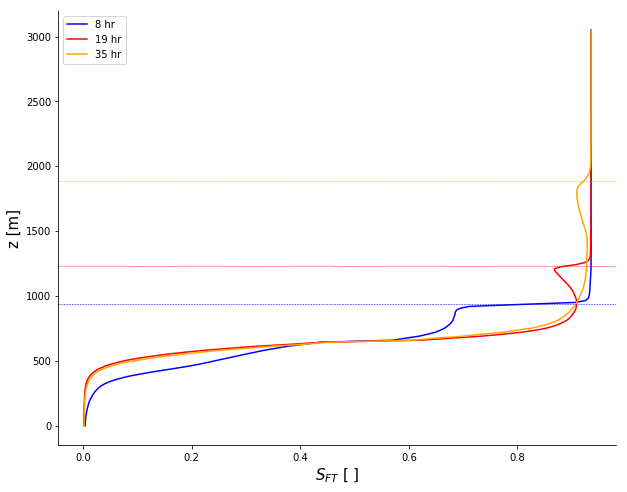

In [6]:

SSFFTT = Dataset(aim_dir + "profiles.002.nc").variables['sc002'][:]
zzii = Dataset(aim_dir + "tmser.002.nc").variables['zi'][:]
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
z = np.linspace(0,3048,zp)
colors = itertools.cycle(['blue','red','orange'])
ax = plt.subplots(1,1,figsize=(10,8))
ax = plt.subplot(111)
plt.plot(SSFFTT[8*60,:],z,color=next(colors),label='8 hr')
plt.plot(SSFFTT[19*60,:],z,color=next(colors),label='19 hr')
plt.plot(SSFFTT[35*60,:],z,color=next(colors),label='35 hr')
plt.axhline(y =zzii[8*60],linewidth=0.5,color=next(colors), linestyle='--')
plt.axhline(y =zzii[19*60],linewidth=0.5,color=next(colors), linestyle='--')
plt.axhline(y =zzii[35*60],linewidth=0.5,color=next(colors), linestyle='--')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('$S_{FT}$ [ ]',fontsize=15)
plt.ylabel('z [m]',fontsize=15)
plt.legend()
plt.savefig(fig_dir + "SFTprofile.eps")

In [ ]:
# Find the perturbuation and calculate for thv and TKE
ql_avg  = np.zeros(zp)
qt_avg  = np.zeros(zp)
thl_avg = np.zeros(zp)
thv_avg = np.zeros(zp)
u_avg   = np.zeros(zp)
TKE_avg = np.zeros(zp)
v_avg   = np.zeros(zp)
w_avg   = np.zeros(zp)
SBL_avg = np.zeros(zp)

SBLp = np.zeros([zp,xp,yp])
thlp = np.zeros([zp,xp,yp])
thvp = np.zeros([zp,xp,yp])
thv = np.zeros([zp,xp,yp])
TKEp = np.zeros([zp,xp,yp])
TKE = np.zeros([zp,xp,yp])
qtp = np.zeros([zp,xp,yp])
qlp = np.zeros([zp,xp,yp])
up   = np.zeros([zp,xp,yp])
wp   = np.zeros([zp,xp,yp])
vp   = np.zeros([zp,xp,yp])
for j in range(zp):
    ql_avg[j] = np.mean(qltemp[j,:,:])
    qt_avg[j] = np.mean(qttemp[j,:,:])
    SBL_avg[j] = np.mean(SBLtemp[j,:,:])
    thl_avg[j] = np.mean(thltemp[j,:,:])
    u_avg[j] = np.mean(utemp[j,:,:])
    v_avg[j] = np.mean(vtemp[j,:,:])
    w_avg[j] = np.mean(wtemp[j,:,:])
# Find the perturbation
for x in range(xp):
    for y in range(yp):
        for z in range(zp):
            SBLp[z,x,y] = SBLtemp[z,x,y] - SBL_avg[z]
            thlp[z,x,y] = thltemp[z,x,y] - thl_avg[z]
            #qlp[pt]  = qltemp[pt] - ql_avg[z_index]
            qtp[z,x,y]  = qttemp[z,x,y] - qt_avg[z]
            wp[z,x,y]   = wtemp[z,x,y] - w_avg[z]
            up[z,x,y]   = utemp[z,x,y] - u_avg[z]
            vp[z,x,y]   = vtemp[z,x,y] - v_avg[z] 
            TKE[z,x,y] = 0.5 * (up[z,x,y] ** 2 + vp[z,x,y] ** 2 + wp[z,x,y] ** 2)
            thv[z,x,y] = (1 + 0.608 * qttemp[z,x,y] - qltemp[z,x,y] / 0.622) * (thltemp[z,x,y] + 2.5e3  * qltemp[z,x,y])
for j in range(zp):
    TKE_avg[j] = np.mean(TKE[j,:,:])
    thv_avg[j] = np.mean(thv[j,:,:])
for x in range(xp):
    for y in range(yp):
        for z in range(zp):
            TKEp[z,x,y] = TKE[z,x,y] - SBL_avg[z]
            thvp[z,x,y] = thv[z,x,y] - thl_avg[z]

In [ ]:
# Find the inversion vertical grid
# Find inversion height with various method
# stt/stb/ct/cb
# cloudtop/cloudbase highest and lowest level with ql > 0
# stratustop/stratusbase \sigma_{cld} > 0.4
# cumulusmax/cumulusmin below the stratocumulus maximum and minimum
slab_count = xp * yp
cfrac = np.zeros(zp)
for z_index in range(zp):
    for x_index in range(xp):
        for y_index in range(yp):
            if qltemp[z_index,x_index,y_index] > 0:
                cfrac[z_index] = cfrac[z_index] + 1
ct = [cc for cc, e in enumerate(cfrac) if e > 0][-1]
cb = [cc for cc, e in enumerate(cfrac) if e > 0][0]
if np.max(cfrac/slab_count) > 0.4:
    stt = [cc for cc, e in enumerate(cfrac/slab_count) if e > 0.4][-1]
    stb = [cc for cc, e in enumerate(cfrac/slab_count) if e > 0.4][0]
# Note to my self 
# Add cumulusmax and cumulusmin later with real data.
# From the sea surface, the first one with negative diff and the second one with postisive diff.
# Get the subcloud layer height for to do the parameterization for different type of turbulence
subcld = [cc for cc, e in enumerate(np.diff(cfrac/slab_count)) if e < 0][0]

In [ ]:
# Now using Monica's spectra with different result
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
z = np.linspace(0,3048,zp)
xx,zz = np.meshgrid(x,z)
xxx,yyy = np.meshgrid(x,y)
slab_count = xp * yp
def spec_2d(z_index,var):
    tempp = np.zeros([xp,yp])
    u_xy = var[z_index,:,:]
    utempp = u_xy - np.mean(u_xy)
    ###
    nx=512; 
    ny=nx
    N=nx
    a_u=[]
    e_u=np.zeros([nx,nx])
    k=[]
    kkk = np.linspace(-N/2,N/2-1,N)
    k = (2*np.pi/(max(x))) * kkk
    dk = k[2] - k[1];
    for ix in range(nx):
        a_u = np.fft.fftshift(np.fft.fft(utempp[ix,:]))
        e_u[ix,:] = 2 * (abs(a_u)**2)/dk/N**2 
    eSA_u = np.mean(e_u,0); eTA_u = np.mean(eSA_u,0)
    return(eSA_u)
N = 512
diff_h = [ct,stt,stb,subcld]
kkk = np.linspace(-N/2,N/2-1,N)
k = (2*np.pi/(max(x))) * kkk
w_spectrum_1 = spec_2d(diff_h[0],wtemp)
qt_spectrum_1 = spec_2d(diff_h[0],qttemp)
SBL_spectrum_1 = spec_2d(diff_h[0],SBLtemp)
SFT_spectrum_1 = spec_2d(diff_h[0],SFTtemp)

w_spectrum_2 = spec_2d(diff_h[1],wtemp)
qt_spectrum_2 = spec_2d(diff_h[1],qttemp)
SBL_spectrum_2 = spec_2d(diff_h[1],SBLtemp)
SFT_spectrum_2 = spec_2d(diff_h[1],SFTtemp)

w_spectrum_3 = spec_2d(diff_h[2],wtemp)
qt_spectrum_3 = spec_2d(diff_h[2],qttemp)
SBL_spectrum_3 = spec_2d(diff_h[2],SBLtemp)
SFT_spectrum_3 = spec_2d(diff_h[2],SFTtemp)

w_spectrum_4 = spec_2d(diff_h[3],wtemp)
qt_spectrum_4 = spec_2d(diff_h[3],qttemp)
SBL_spectrum_4 = spec_2d(diff_h[3],SBLtemp)
SFT_spectrum_4 = spec_2d(diff_h[3],SFTtemp)

In [ ]:
colors = itertools.cycle(["pink","green","orange","red"])
plt.subplots(2,2,figsize=(10,10))
ax = plt.subplot(221)
plt.plot(k,w_spectrum_1,color=next(colors),label = '$z_{cldtop}$')
plt.plot(k,w_spectrum_2,color=next(colors),label = '$z_{Sctop}$')
plt.plot(k,w_spectrum_3,color=next(colors),label = '$z_{Scbot}$')
plt.plot(k,w_spectrum_4,color=next(colors),label = '$z_{subcld}$')
xtemp = np.linspace(0.05,1,1000)
#plt.plot(xtemp,10 ** (-5/3) * xtemp)
plt.plot(xtemp,xtemp ** (-5/3)*1e-2,color='black',label='-5/3 slope')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\kappa \ \ [m^{-1}]$',fontsize=15)
plt.ylabel('$E_{w} [m^3s^{-2}]$',fontsize=15)
plt.legend()
lgnd = ax.legend(loc='lower left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(222)
plt.plot(k,qt_spectrum_1,color=next(colors),label = '$z_{cldtop}$')
plt.plot(k,qt_spectrum_2,color=next(colors),label = '$z_{Sctop}$')
plt.plot(k,qt_spectrum_3,color=next(colors),label = '$z_{Scbot}$')
plt.plot(k,qt_spectrum_4,color=next(colors),label = '$z_{subcld}$')
xtemp = np.linspace(1e-2,0.5,1000)
plt.plot(xtemp,xtemp ** (-5/3) *1e-8 ,color='black',label='-5/3 slope')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\kappa \ \ [m^{-1}]$',fontsize=15)
plt.ylabel('$E_{q_t} [g^2/kg^2m]$',fontsize=15)
plt.legend()
lgnd = ax.legend(loc='lower left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(223)
plt.plot(k,SBL_spectrum_1,color=next(colors),label = '$z_{cldtop}$')
plt.plot(k,SBL_spectrum_2,color=next(colors),label = '$z_{Sctop}$')
plt.plot(k,SBL_spectrum_3,color=next(colors),label = '$z_{Scbot}$')
plt.plot(k,SBL_spectrum_4,color=next(colors),label = '$z_{subcld}$')
xtemp = np.linspace(1e-2,0.5,1000)
plt.plot(xtemp,xtemp ** (-5/3) * 1e-4,color='black',label='-5/3 slope')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\kappa \ \ [m^{-1}]$',fontsize=15)
plt.ylabel('$E_{S_{BL}}$',fontsize=15)
plt.legend()
lgnd = ax.legend(loc='lower left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax = plt.subplot(224)
plt.plot(k,SFT_spectrum_1,color=next(colors),label = '$z_{cldtop}$')
plt.plot(k,SFT_spectrum_2,color=next(colors),label = '$z_{Sctop}$')
plt.plot(k,SFT_spectrum_3,color=next(colors),label = '$z_{Scbot}$')
plt.plot(k,SFT_spectrum_4,color=next(colors),label = '$z_{subcld}$')
xtemp = np.linspace(1e-2,0.5,1000)
plt.plot(xtemp,xtemp ** (-5/3) * 1e-3,color='black',label='-5/3 slope')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('$\kappa \ \ [m^{-1}]$',fontsize=15)
plt.ylabel('$E_{S_{FT}}$',fontsize=15)
plt.legend()
lgnd = ax.legend(loc='lower left')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.tight_layout()
plt.savefig(fig_dir + 'spctra_2d.eps')

In [ ]:
xx

In [ ]:
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
z = np.linspace(0,3048,zp)
xx,zz = np.meshgrid(x,z)
j = 21 ## Cross-section
ql_2d = qltemp[:,j,:] * 1e2 # g/kg
qt_2d = qttemp[:,j,:]
SBL_2d = SBLtemp[:,j,:]
SFT_2d = SFTtemp[:,j,:]
thl_2d = thltemp[:,j,:]
#thv_2d = thv[:,j,:]
w_2d = wp[:,j,:]
u_2d = up[:,j,:]
v_2d = vp[:,j,:]

[u_dir,v_dir,w_dir,x_dir,y_dir,z_dir] = window_qui(x,y,u_2d,v_2d,w_2d) # Use a small average window to get a better look
fig, axs = plt.subplots(2, 2,figsize=(30/1.5,15/1.5))
#fig.suptitle('Cross-section at Y=35m at 4h (Stratocumulus)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xx,zz,ql_2d*1e3,200,cmap = 'Blues_r')

plt.title('Liquid water mixing ratio [g/kg]',fontsize=20)
plt.xlabel('X [m]',fontsize=20)
plt.ylabel('Z [m]',fontsize=20)
fig.colorbar(cs, ax=ax, shrink=0.9)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axhline(y =z[subcld],linewidth=1, color='red')
ax = plt.subplot(222)
cs = plt.contourf(xx,zz,w_2d,200,cmap='bwr')
plt.quiver(x_dir, z_dir, v_dir, w_dir, width=0.003,scale=15)
plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=20)
plt.ylabel('Z [m]',fontsize=20)
fig.colorbar(cs, ax=ax, shrink=0.9)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axhline(y =z[subcld],linewidth=1, color='red')
ax=plt.subplot(223)
cs = plt.contourf(xx,zz,SFT_2d,200,cmap=parula_map)
plt.title('$S_{FT}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=20)
plt.ylabel('Z [m]',fontsize=20)
fig.colorbar(cs, ax=ax, shrink=0.9)
#cs.set_clim(0,1) #correct
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axhline(y =z[subcld],linewidth=1, color='red')
ax=plt.subplot(224)
cs = ax.contourf(xx,zz,SBL_2d,200, cmap=jaisnd)
plt.title('$S_{BL}$ [-]',fontsize=20)
plt.xlabel('X [m]',fontsize=20)
plt.ylabel('Z [m]',fontsize=20)
fig.colorbar(cs, ax=ax, shrink=0.9)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axhline(y =z[subcld],linewidth=1, color='red')
fig.tight_layout()
plt.savefig(fig_dir + 'cross_8.png',ppi = 400)

In [ ]:
##### Horizontal for 4 height
#ct/cb/stt/stb
ratio = 0.2
ql_2d = qltemp[int(ratio*ct),:,:] * 1e2 # g/kg
SBL_2d = SBLtemp[int(ratio*ct),:,:]
SFT_2d = SFTtemp[int(ratio*ct),:,:]
thl_2d = thltemp[int(ratio*ct),:,:]
w_2d = wtemp[int(ratio*ct),:,:]
fig, axs = plt.subplots(2, 2,figsize=(15,13))
#fig.suptitle('Cross-section at Y=35m at 4h (Stratocumulus)',fontsize=30)
ax = plt.subplot(221)
cs = plt.contourf(xxx,yyy,ql_2d*1e3,200,cmap = 'Blues_r')
plt.title('Liquid water mixing ratio [g/kg]',fontsize=15)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Y [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
ax = plt.subplot(222)
cs = plt.contourf(xxx,yyy,w_2d,200,cmap = 'bwr')
plt.title('Vertical velocity [m/s]',fontsize=15)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Y [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
ax = plt.subplot(223)
cs = plt.contourf(xxx,yyy,SFT_2d,200,cmap = parula_map)
plt.title('$S_{FT}$ [-]',fontsize=15)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Y [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
ax = plt.subplot(224)
cs = plt.contourf(xxx,yyy,SBL_2d,200,cmap = jaisnd)
plt.title('$S_{BL}$ [-]',fontsize=15)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Y [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
plt.tight_layout()
plt.savefig(fig_dir + 'slab_09.png',dpi = 400)

In [ ]:
# Sextant analysis
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
z = np.linspace(0,3048,zp)
xx,zz = np.meshgrid(x,z)
slice_index = 43
fig = plt.figure(figsize = (12,8))
levels = np.arange(0, 5, 1)
sex[ct:-1,:,:] = - 1e-12
sex[-1,:,:] = - 1e-12
cs = plt.contourf(xx,zz,sex[:,slice_index,:], cmap = cmap_quadrant, levels = levels)
plt.ylabel(r'0 $\leqslant$ Z $\leqslant$ 3048 [m]',fontsize=20)
plt.xlabel(r'0 $\leqslant$ X $\leqslant$ 4480 [m]',fontsize=20)
plt.title('Quadrants at cross-section X=369.8m after wPDF filtering',fontsize = 24, fontdict={'verticalalignment': 'bottom'})
plt.xticks([],[])
plt.yticks([],[])
plt.axhline(y =z[cb],linewidth=2.5, color='black')
plt.tight_layout()
# cbar = fig.colorbar(cs, ticks = [0.5, 1.5, 2.5, 3.5])
# cbar.ax.set_yticklabels(['Ascending shell','Updraft', 'Downdraft', 
#                          'Subsiding shell'], rotation = -90, fontdict={'verticalalignment':'center'})  # vertically oriented colorbar
plt.savefig(fig_dir + 'quad_19_whole_after.png',dpi=400)

In [ ]:
# Sextant analysis
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
z = np.linspace(0,3048,zp)
xx,zz = np.meshgrid(x,z)
slice_index = 43
fig = plt.figure(figsize = (12,8))
levels = np.arange(0, 5, 1)
quad[ct:-1,:,:] = - 1e-12
quad[-1,:,:] = - 1e-12
cs = plt.contourf(xx,zz,quad[:,slice_index,:], cmap = cmap_quadrant, levels = levels)
plt.ylabel(r'0 $\leqslant$ Z $\leqslant$ 3048 [m]',fontsize=20)
plt.xlabel(r'0 $\leqslant$ X $\leqslant$ 4480 [m]',fontsize=20)
plt.title('Quadrants at cross-section X=369.8m before wPDF filtering',fontsize = 24, fontdict={'verticalalignment': 'bottom'})
plt.xticks([],[])
plt.yticks([],[])
plt.axhline(y =z[cb],linewidth=2.5, color='black')
plt.tight_layout()
# cbar = fig.colorbar(cs, ticks = [0.5, 1.5, 2.5, 3.5])
# cbar.ax.set_yticklabels(['Ascending shell','Updraft', 'Downdraft', 
#                          'Subsiding shell'], rotation = -90, fontdict={'verticalalignment':'center'})  # vertically oriented colorbar
plt.savefig(fig_dir + 'quad_19_whole_before.png',dpi=400)

In [ ]:
UU_count

In [ ]:
## i_UU = np.zeros(zp)
i_DD = np.zeros(zp)
i_AS = np.zeros(zp)
i_SS = np.zeros(zp)
i_UU = np.zeros(zp)

quad_UU = np.zeros([zp*xp*yp,9])
quad_DD = np.zeros([zp*xp*yp,9])
quad_AS = np.zeros([zp*xp*yp,9])
quad_SS = np.zeros([zp*xp*yp,9])

UU_count = 0
DD_count = 0
AS_count = 0
SS_count = 0
#Quadrant analysis
quad = np.zeros([zp,xp,yp],dtype = int) - 1e-12 # Little hack to get a usable colorbar
#qtp,qltemp,thl,utemp,vtemp,wp,tke,thvp,z_index
for x in range(xp):
    for y in range(yp):
        for z in range(zp):
            if (SBLp[z,x,y] < 0 and # Updraft
                wp[z,x,y] > 0
                ):
                quad[z,x,y] = 2
                quad_UU[UU_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                UU_count += 1
                i_UU[z] += 1
                
            if (SBLp[z,x,y] > 0 and # Downdraft
                wp[z,x,y] < 0
                ):
                quad[z,x,y] = 3  
                quad_DD[DD_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                DD_count += 1
                i_DD[z] += 1
                
            if (SBLp[z,x,y] > 0 and # Ascending shell
                wp[z,x,y] > 0 
                ):
                quad[z,x,y] = 1
                quad_AS[AS_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                AS_count += 1
                i_AS[z] += 1
                
            if (SBLp[z,x,y] < 0 and # Subsiding shell 
                wp[z,x,y] < 0 
                ):
                quad[z,x,y] = 4
                quad_SS[SS_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                SS_count += 1
                i_SS[z] += 1

In [ ]:
# Calculate the slab average and flux for each quadrant

AS_qt_avg = np.zeros(zp) + np.nan
UU_qt_avg = np.zeros(zp) + np.nan
DD_qt_avg = np.zeros(zp) + np.nan
SS_qt_avg = np.zeros(zp) + np.nan
AS_qt_std = np.zeros(zp) 
UU_qt_std = np.zeros(zp) 
DD_qt_std = np.zeros(zp) 
SS_qt_std = np.zeros(zp) 



AS_thl_avg = np.zeros(zp) + np.nan
UU_thl_avg = np.zeros(zp) + np.nan
DD_thl_avg = np.zeros(zp) + np.nan
SS_thl_avg = np.zeros(zp) + np.nan
AS_thl_std = np.zeros(zp)  # for the error bar
UU_thl_std = np.zeros(zp)
DD_thl_std = np.zeros(zp)
SS_thl_std = np.zeros(zp) 


AS_TKE_avg = np.zeros(zp) + np.nan
UU_TKE_avg = np.zeros(zp) + np.nan
DD_TKE_avg = np.zeros(zp) + np.nan
SS_TKE_avg = np.zeros(zp) + np.nan


AS_w_avg = np.zeros(zp) + np.nan
UU_w_avg = np.zeros(zp) + np.nan
DD_w_avg = np.zeros(zp) + np.nan
SS_w_avg = np.zeros(zp) + np.nan
AS_w_std = np.zeros(zp)
UU_w_std = np.zeros(zp) 
DD_w_std = np.zeros(zp) 
SS_w_std = np.zeros(zp) 


AS_ql_avg = np.zeros(zp) + np.nan
UU_ql_avg = np.zeros(zp) + np.nan
DD_ql_avg = np.zeros(zp) + np.nan
SS_ql_avg = np.zeros(zp) + np.nan


AS_hflx_avg = np.zeros(zp)
UU_hflx_avg = np.zeros(zp)
DD_hflx_avg = np.zeros(zp)
SS_hflx_avg = np.zeros(zp)


AS_qflx_avg = np.zeros(zp) 
UU_qflx_avg = np.zeros(zp) 
DD_qflx_avg = np.zeros(zp) 
SS_qflx_avg = np.zeros(zp) 


DDtemp = 0
UUtemp = 0
SStemp = 0
AStemp = 0

AS_w = np.zeros([xp*yp,zp])
UU_w = np.zeros([xp*yp,zp])
DD_w = np.zeros([xp*yp,zp])
SS_w = np.zeros([xp*yp,zp])

# qt,ql,thl,u,v,w,TKE,thv,z
# qtp,qltemp,thl,utemp,vtemp,wp,tke,thvp,z_index
for z_index in range(zp):

    if (i_DD[z_index] != 0):
        DD_qt_avg[z_index] = np.mean(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),0])
        DD_qt_std[z_index] = np.std(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),0])
        DD_ql_avg[z_index] = np.mean(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),1])
        DD_thl_avg[z_index] = np.mean(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),2])
        DD_thl_std[z_index] = np.std(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),2])
        DD_TKE_avg[z_index] = np.mean(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),6])
        DD_w_avg[z_index] = np.mean(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),5])
        DD_w_std[z_index] = np.std(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),5])
        DD_w[0:np.size(quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),5]),z_index] = quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),5]
        DD_hflx_avg[z_index] = np.sum((quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),2] - thl_avg[z_index]) * (quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),5] - w_avg[z_index])) / slab_count
        DD_qflx_avg[z_index] = np.sum((quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),0] - qt_avg[z_index]) * (quad_DD[DDtemp:int(DDtemp + i_DD[z_index]),5] - w_avg[z_index])) / slab_count
        DDtemp = int(DDtemp + i_DD[z_index])
        
    if (i_UU[z_index] != 0):
        UU_qt_avg[z_index] = np.mean(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),0])
        UU_qt_std[z_index] = np.std(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),0])
        UU_ql_avg[z_index] = np.mean(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),1])
        UU_thl_avg[z_index] = np.mean(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),2])
        UU_thl_std[z_index] = np.std(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),2])
        UU_TKE_avg[z_index] = np.mean(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),6])
        UU_w_avg[z_index] =   np.mean(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),5])
        UU_w_std[z_index] =   np.std(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),5])
        UU_w[0:np.size(quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),5]),z_index] = quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),5]
        UU_hflx_avg[z_index] = np.sum((quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),2] - thl_avg[z_index]) * (quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),5] - w_avg[z_index])) / slab_count
        UU_qflx_avg[z_index] = np.sum((quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),0] - qt_avg[z_index]) * (quad_UU[UUtemp:int(UUtemp + i_UU[z_index]),5] - w_avg[z_index])) / slab_count
        UUtemp = int(UUtemp + i_UU[z_index])
        
    if (i_SS[z_index] != 0):
        SS_qt_avg[z_index] = np.mean(quad_SS[SStemp:int(SStemp + i_SS[z_index]),0])
        SS_qt_std[z_index] = np.std(quad_SS[SStemp:int(SStemp + i_SS[z_index]),0])
        SS_ql_avg[z_index] = np.mean(quad_SS[SStemp:int(SStemp + i_SS[z_index]),1])
        SS_thl_avg[z_index] = np.mean(quad_SS[SStemp:int(SStemp + i_SS[z_index]),2])
        SS_thl_std[z_index] = np.std(quad_SS[SStemp:int(SStemp + i_SS[z_index]),2])
        SS_TKE_avg[z_index] = np.mean(quad_SS[SStemp:int(SStemp + i_SS[z_index]),6])
        SS_w_avg[z_index] = np.mean(quad_SS[SStemp:int(SStemp + i_SS[z_index]),5])
        SS_w_std[z_index] = np.std(quad_SS[SStemp:int(SStemp + i_SS[z_index]),5])
        SS_w[0:np.size(quad_SS[SStemp:int(SStemp + i_SS[z_index]),5]),z_index] = quad_SS[SStemp:int(SStemp + i_SS[z_index]),5]
        SS_hflx_avg[z_index] = np.sum((quad_SS[SStemp:int(SStemp + i_SS[z_index]),2] - thl_avg[z_index]) * (quad_SS[SStemp:int(SStemp + i_SS[z_index]),5] - w_avg[z_index])) / slab_count
        SS_qflx_avg[z_index] = np.sum((quad_SS[SStemp:int(SStemp + i_SS[z_index]),0] - qt_avg[z_index]) * (quad_SS[SStemp:int(SStemp + i_SS[z_index]),5] - w_avg[z_index])) / slab_count
        SStemp = int(SStemp + i_SS[z_index])
        
    if (i_AS[z_index] != 0):
        AS_qt_avg[z_index] = np.mean(quad_AS[AStemp:int(AStemp + i_AS[z_index]),0])
        AS_qt_std[z_index] = np.std(quad_AS[AStemp:int(AStemp + i_AS[z_index]),0])
        AS_ql_avg[z_index] = np.mean(quad_AS[AStemp:int(AStemp + i_AS[z_index]),1])
        AS_thl_avg[z_index] = np.mean(quad_AS[AStemp:int(AStemp + i_AS[z_index]),2])
        AS_thl_std[z_index] = np.std(quad_AS[AStemp:int(AStemp + i_AS[z_index]),2])
        AS_TKE_avg[z_index] = np.mean(quad_AS[AStemp:int(AStemp + i_AS[z_index]),6])
        AS_w_avg[z_index] = np.mean(quad_AS[AStemp:int(AStemp + i_AS[z_index]),5])
        AS_w_std[z_index] = np.std(quad_AS[AStemp:int(AStemp + i_AS[z_index]),5])
        AS_w[0:np.size(quad_AS[AStemp:int(AStemp + i_AS[z_index]),5]),z_index] = quad_AS[AStemp:int(AStemp + i_AS[z_index]),5]
        AS_hflx_avg[z_index] = np.sum((quad_AS[AStemp:int(AStemp + i_AS[z_index]),2] - thl_avg[z_index]) * (quad_AS[AStemp:int(AStemp + i_AS[z_index]),5] - w_avg[z_index])) / slab_count
        AS_qflx_avg[z_index] = np.sum((quad_AS[AStemp:int(AStemp + i_AS[z_index]),0] - qt_avg[z_index]) * (quad_AS[AStemp:int(AStemp + i_AS[z_index]),5] - w_avg[z_index])) / slab_count
        AStemp = int(AStemp + i_AS[z_index])
        
                                


In [ ]:
deta = 1
x_w = np.linspace(0,deta,deta/0.0001)

In [ ]:
colors = itertools.cycle(['#0485d1','#00035b','#e50000','#f97306'])
idxh = 90
fig1 = plt.figure(facecolor='white',figsize=(2,2))
ax1 = plt.axes(frameon=False)
#sns.distplot( AS_w[0:np.where(AS_w[:,idxh] == 0)[0][0],idxh])
N, bins, patches = plt.hist( DD_w[0:np.where(DD_w[:,idxh] == 0)[0][0],idxh],bins=20,color='#00035b',linewidth=1)
for i in range(18,20):
    patches[i].set_facecolor('#0485d1')
N, bins, patches = plt.hist( UU_w[0:np.where(UU_w[:,idxh] == 0)[0][0],idxh],bins=20,color='#e50000')
for i in range(0,2):
    patches[i].set_facecolor('#f97306')
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')
ax1.axes.get_xaxis().set_visible(False)
plt.tight_layout()
plt.savefig(fig_dir + 'wpdf' + str(idxh) + '.png', dpi=200 )

In [ ]:
# Sextant analysis
sex = np.zeros([zp,xp,yp],dtype = int) - 1e-12 # Little hack to get a usable colorbar
sex_UU = np.zeros([zp*xp*yp,9])
sex_DD = np.zeros([zp*xp*yp,9])
sex_AS = np.zeros([zp*xp*yp,9])
sex_SS = np.zeros([zp*xp*yp,9])
#sex_CU = np.zeros([zp*xp*yp,9])
#sex_CD = np.zeros([zp*xp*yp,9])

ai_UU = np.zeros(zp)
ai_DD = np.zeros(zp)
ai_AS = np.zeros(zp)
ai_SS = np.zeros(zp)
ai_CU = np.zeros(zp)
ai_CD = np.zeros(zp)



aUU_count = 0
aDD_count = 0
aAS_count = 0
aSS_count = 0
aCU_count = 0
aCD_count = 0

wppmin = np.zeros(zp)
wppmax = np.zeros(zp)

for z in range(zp):
    wppmax[z] = np.percentile(wp[z,:,:], 85)
    wppmin[z] = np.percentile(wp[z,:,:], 15)

# qtp,qltemp,thl,utemp,vtemp,wp,tke,thvp,z_index
for x in range(xp):
    for y in range(yp):
        for z in range(zp):
            if (SBLp[z,x,y] < 0 and # Updraft
                wp[z,x,y] > wppmax[z]
                ):
                sex[z,x,y] = 2
                sex_UU[aUU_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                aUU_count += 1
                ai_UU[z] += 1
                
            if (SBLp[z,x,y] > 0 and # Downdraft
                wp[z,x,y] < wppmin[z]
                ):
                sex[z,x,y] = 3
                sex_DD[aDD_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                aDD_count += 1
                ai_DD[z] += 1
                
            if (SBLp[z,x,y] > 0 and # Ascending shell
                wp[z,x,y] > 0 
                ):
                sex[z,x,y] = 1
                sex_AS[aAS_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                aAS_count += 1
                ai_AS[z] += 1
                
            if (SBLp[z,x,y] < 0 and # Subsiding shell 
                wp[z,x,y] < 0 
                ):
                sex[z,x,y] = 4
                sex_SS[aSS_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                aSS_count += 1
                ai_SS[z] += 1
    
            if (SBLp[z,x,y] < 0 and # compl. updraft  --> AS
                wp[z,x,y] > 0 and 
                wp[z,x,y] <= wppmax[z]
                ):
                sex[z,x,y] = 1
                sex_AS[aAS_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                aAS_count += 1
                ai_AS[z] += 1
                
            if (SBLp[z,x,y] > 0 and # compl. downdraft --> SS
                wp[z,x,y] < 0 and
                wp[z,x,y] >= wppmin[z]
                ):
                sex[z,x,y] = 4
                sex_SS[aSS_count,:] = [qtp[z,x,y],qltemp[z,x,y],thlp[z,x,y],utemp[z,x,y],vtemp[z,x,y],wp[z,x,y],TKE[z,x,y],thvp[z,x,y],z]
                aSS_count += 1
                ai_SS[z] += 1
                

In [ ]:
# Calculate the slab average and flux for each sextant

aAS_qt_avg = np.zeros(zp) + np.nan
aUU_qt_avg = np.zeros(zp) + np.nan
aDD_qt_avg = np.zeros(zp) + np.nan
aSS_qt_avg = np.zeros(zp) + np.nan
aAS_qt_std = np.zeros(zp) 
aUU_qt_std = np.zeros(zp) 
aDD_qt_std = np.zeros(zp) 
aSS_qt_std = np.zeros(zp) 



aAS_thl_avg = np.zeros(zp) + np.nan
aUU_thl_avg = np.zeros(zp) + np.nan
aDD_thl_avg = np.zeros(zp) + np.nan
aSS_thl_avg = np.zeros(zp) + np.nan
aAS_thl_std = np.zeros(zp)  # for the error bar
aUU_thl_std = np.zeros(zp)
aDD_thl_std = np.zeros(zp)
aSS_thl_std = np.zeros(zp) 


aAS_TKE_avg = np.zeros(zp) + np.nan
aUU_TKE_avg = np.zeros(zp) + np.nan
aDD_TKE_avg = np.zeros(zp) + np.nan
aSS_TKE_avg = np.zeros(zp) + np.nan


aAS_w_avg = np.zeros(zp) + np.nan
aUU_w_avg = np.zeros(zp) + np.nan
aDD_w_avg = np.zeros(zp) + np.nan
aSS_w_avg = np.zeros(zp) + np.nan
aAS_w_std = np.zeros(zp)
aUU_w_std = np.zeros(zp) 
aDD_w_std = np.zeros(zp) 
aSS_w_std = np.zeros(zp) 



aAS_ql_avg = np.zeros(zp) + np.nan
aUU_ql_avg = np.zeros(zp) + np.nan
aDD_ql_avg = np.zeros(zp) + np.nan
aSS_ql_avg = np.zeros(zp) + np.nan


aAS_hflx_avg = np.zeros(zp)
aUU_hflx_avg = np.zeros(zp)
aDD_hflx_avg = np.zeros(zp)
aSS_hflx_avg = np.zeros(zp)


aAS_qflx_avg = np.zeros(zp) 
aUU_qflx_avg = np.zeros(zp) 
aDD_qflx_avg = np.zeros(zp) 
aSS_qflx_avg = np.zeros(zp) 


aDDtemp = 0
aUUtemp = 0
aSStemp = 0
aAStemp = 0

# qt,ql,thl,u,v,w,TKE,thv,z
# qtp,qltemp,thl,utemp,vtemp,wp,tke,thvp,z_index
for z_index in range(zp):

    if (ai_DD[z_index] != 0):
        aDD_qt_avg[z_index] = np.mean(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),0])
        aDD_qt_std[z_index] = np.std(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),0])
        aDD_ql_avg[z_index] = np.mean(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),1])
        aDD_thl_avg[z_index] = np.mean(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),2])
        aDD_thl_std[z_index] = np.std(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),2])
        aDD_TKE_avg[z_index] = np.mean(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),6])
        aDD_w_avg[z_index] = np.mean(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),5])
        aDD_w_std[z_index] = np.std(sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),5])
        aDD_hflx_avg[z_index] = np.sum((sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),2] - thl_avg[z_index]) * (sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),5] - w_avg[z_index])) / slab_count
        aDD_qflx_avg[z_index] = np.sum((sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),0] - qt_avg[z_index]) * (sex_DD[aDDtemp:int(aDDtemp + ai_DD[z_index]),5] - w_avg[z_index])) / slab_count
        aDDtemp = int(aDDtemp + ai_DD[z_index])
        
    if (ai_UU[z_index] != 0):
        aUU_qt_avg[z_index] = np.mean(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),0])
        aUU_qt_std[z_index] = np.std(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),0])
        aUU_ql_avg[z_index] = np.mean(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),1])
        aUU_thl_avg[z_index] = np.mean(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),2])
        aUU_thl_std[z_index] = np.std(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),2])
        aUU_TKE_avg[z_index] = np.mean(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),6])
        aUU_w_avg[z_index] =   np.mean(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),5])
        aUU_w_std[z_index] =   np.std(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),5])
        aUU_hflx_avg[z_index] = np.sum((sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),2] - thl_avg[z_index]) * (sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),5] - w_avg[z_index])) / slab_count
        aUU_qflx_avg[z_index] = np.sum((sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),0] - qt_avg[z_index]) * (sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),5] - w_avg[z_index])) / slab_count
        aUUtemp = int(aUUtemp + ai_UU[z_index])
        
    if (ai_SS[z_index] != 0):
        aSS_qt_avg[z_index] = np.mean(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),0])
        aSS_qt_std[z_index] = np.std(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),0])
        aSS_ql_avg[z_index] = np.mean(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),1])
        aSS_thl_avg[z_index] = np.mean(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),2])
        aSS_thl_std[z_index] = np.std(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),2])
        aSS_TKE_avg[z_index] = np.mean(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),6])
        aSS_w_avg[z_index] = np.mean(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),5])
        aSS_w_std[z_index] = np.std(sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),5])
        aSS_hflx_avg[z_index] = np.sum((sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),2] - thl_avg[z_index]) * (sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),5] - w_avg[z_index])) / slab_count
        aSS_qflx_avg[z_index] = np.sum((sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),0] - qt_avg[z_index]) * (sex_SS[aSStemp:int(aSStemp + ai_SS[z_index]),5] - w_avg[z_index])) / slab_count
        aSStemp = int(aSStemp + ai_SS[z_index])
        
    if (ai_AS[z_index] != 0):
        aAS_qt_avg[z_index] = np.mean(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),0])
        aAS_qt_std[z_index] = np.std(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),0])
        aAS_ql_avg[z_index] = np.mean(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),1])
        aAS_thl_avg[z_index] = np.mean(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),2])
        aAS_thl_std[z_index] = np.std(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),2])
        aAS_TKE_avg[z_index] = np.mean(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),6])
        aAS_w_avg[z_index] = np.mean(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),5])
        aAS_w_std[z_index] = np.std(sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),5])
        aAS_hflx_avg[z_index] = np.sum((sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),2] - thl_avg[z_index]) * (sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),5] - w_avg[z_index])) / slab_count
        aAS_qflx_avg[z_index] = np.sum((sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),0] - qt_avg[z_index]) * (sex_AS[aAStemp:int(aAStemp + ai_AS[z_index]),5] - w_avg[z_index])) / slab_count
        aAStemp = int(aAStemp + ai_AS[z_index])
        
                                


In [ ]:
z = np.linspace(0,3048,zp)
errev = 10
colors = itertools.cycle(['#0485d1','#00035b','#e50000','#f97306'])
colorss = itertools.cycle(['#0485d1','#00035b','#e50000','#f97306'])
plt.subplots(2,3,figsize=(15,8))
ax = plt.subplot(2,3,1)
plt.errorbar(SS_qt_avg*1e3,z,xerr=(SS_qt_std*1e3/tck),errorevery=errev,color=next(colorss))
plt.errorbar(DD_qt_avg*1e3,z,xerr=(DD_qt_std*1e3),errorevery=errev,color=next(colorss))
plt.errorbar(UU_qt_avg*1e3,z,xerr=(UU_qt_std*1e3),errorevery=errev,color=next(colorss))
plt.errorbar(AS_qt_avg*1e3,z,xerr=(AS_qt_std*1e3/tck),errorevery=errev,color=next(colorss))
plt.plot(SS_qt_avg,z,color=next(colors),label='1 Subsiding shell')
plt.plot(DD_qt_avg,z,color=next(colors),label='2 Downdraft')
plt.plot(UU_qt_avg,z,color=next(colors),label='3 Updraft')
plt.plot(AS_qt_avg,z, color=next(colors),label='4 Ascending shell')
plt.xlabel('$q_t-\overline{q_t}$ [g/kg]',fontsize = 15)
plt.ylabel('Height [m]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.axvline(x = 0,color='k', linestyle='--',linewidth = 0.2)
plt.legend()
lgnd = ax.legend(loc='upper right')
plt.xlim([-0.4,0.4])

ax = plt.subplot(2,3,2)
plt.errorbar(SS_w_avg,z,xerr=(SS_w_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(DD_w_avg,z,xerr=(DD_w_std),errorevery=errev,color=next(colorss))
plt.errorbar(UU_w_avg,z,xerr=(UU_w_std),errorevery=errev,color=next(colorss))
plt.errorbar(AS_w_avg,z,xerr=(AS_w_std/tck),errorevery=errev,color=next(colorss))
plt.plot(SS_w_avg,z,color=next(colors),label='1 Subsiding shell')
plt.plot(DD_w_avg,z,color=next(colors),label='2 Downdraft')
plt.plot(UU_w_avg,z,color=next(colors),label='3 Updraft')
plt.plot(AS_w_avg,z, color=next(colors),label='4 Ascending shell')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.axvline(x = 0,color='k', linestyle='--',linewidth = 0.2)
plt.xlabel('$w-\overline{w}$ [m/s]',fontsize = 15)
plt.legend()
lgnd = ax.legend(loc='upper right')
plt.xlim([-0.5,0.6])

ax = plt.subplot(2,3,3)
plt.errorbar(SS_thl_avg,z,xerr=(SS_thl_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(DD_thl_avg,z,xerr=(DD_thl_std),errorevery=errev,color=next(colorss))
plt.errorbar(UU_thl_avg,z,xerr=(UU_thl_std),errorevery=errev,color=next(colorss))
plt.errorbar(AS_thl_avg,z,xerr=(AS_thl_std/tck),errorevery=errev,color=next(colorss))
plt.plot(SS_thl_avg,z,color=next(colors),label='1 Subsiding shell')
plt.plot(DD_thl_avg,z,color=next(colors),label='2 Downdraft')
plt.plot(UU_thl_avg,z,color=next(colors),label='3 Updraft')
plt.plot(AS_thl_avg,z, color=next(colors),label='4 Ascending shell')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.axvline(x = 0,color='k', linestyle='--',linewidth = 0.2)
plt.xlabel('$\\theta_l-\overline{\\theta_l}$ [K]',fontsize = 15)
plt.legend()
lgnd = ax.legend(loc='upper right')
plt.xlim([-0.6,0.4])


errev = 10
tck = 5
colors = itertools.cycle(['#0485d1','#00035b','#e50000','#f97306'])
colorss = itertools.cycle(['#0485d1','#00035b','#e50000','#f97306'])
ax = plt.subplot(2,3,4)
plt.errorbar(aSS_qt_avg*1e3,z,xerr=(aSS_qt_std*1e3/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aDD_qt_avg*1e3,z,xerr=(aDD_qt_std*1e3/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aUU_qt_avg*1e3,z,xerr=(aUU_qt_std*1e3/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aAS_qt_avg*1e3,z,xerr=(aAS_qt_std*1e3/tck),errorevery=errev,color=next(colorss))
plt.plot(SS_qt_avg,z,color=next(colors),label='1 Subsiding shell')
plt.plot(DD_qt_avg,z,color=next(colors),label='2 Downdraft')
plt.plot(UU_qt_avg,z,color=next(colors),label='3 Updraft')
plt.plot(AS_qt_avg,z, color=next(colors),label='4 Ascending shell')
plt.xlabel('$q_t-\overline{q_t}$ [g/kg]',fontsize = 15)
plt.ylabel('Height [m]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.axvline(x = 0,color='k', linestyle='--',linewidth = 0.2)
plt.legend()
lgnd = ax.legend(loc='upper right')
plt.xlim([-0.4,0.4])

ax = plt.subplot(2,3,5)
plt.errorbar(aSS_w_avg,z,xerr=(aSS_w_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aDD_w_avg,z,xerr=(aDD_w_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aUU_w_avg,z,xerr=(aUU_w_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aAS_w_avg,z,xerr=(aAS_w_std/tck),errorevery=errev,color=next(colorss))
plt.plot(aSS_w_avg,z,color=next(colors),label='1 Subsiding shell')
plt.plot(aDD_w_avg,z,color=next(colors),label='2 Downdraft')
plt.plot(aUU_w_avg,z,color=next(colors),label='3 Updraft')
plt.plot(aAS_w_avg,z, color=next(colors),label='4 Ascending shell')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.axvline(x = 0,color='k', linestyle='--',linewidth = 0.2)
plt.xlabel('$w-\overline{w}$ [m/s]',fontsize = 15)
plt.legend()
lgnd = ax.legend(loc='upper right')
plt.xlim([-0.5,0.6])

ax = plt.subplot(2,3,6)
plt.errorbar(aSS_thl_avg,z,xerr=(aSS_thl_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aDD_thl_avg,z,xerr=(aDD_thl_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aUU_thl_avg,z,xerr=(aUU_thl_std/tck),errorevery=errev,color=next(colorss))
plt.errorbar(aAS_thl_avg,z,xerr=(aAS_thl_std/tck),errorevery=errev,color=next(colorss))
plt.plot(aSS_thl_avg,z,color=next(colors),label='1 Subsiding shell')
plt.plot(aDD_thl_avg,z,color=next(colors),label='2 Downdraft')
plt.plot(aUU_thl_avg,z,color=next(colors),label='3 Updraft')
plt.plot(aAS_thl_avg,z, color=next(colors),label='4 Ascending shell')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.axvline(x = 0,color='k', linestyle='--',linewidth = 0.2)
plt.xlabel('$\\theta_l-\overline{\\theta_l}$ [K]',fontsize = 15)
plt.legend()
lgnd = ax.legend(loc='upper right')
plt.xlim([-0.6,0.4])



plt.tight_layout()
plt.savefig(fig_dir + 'qua_avg.eps')


In [ ]:
# Do the vertical velocity distribution for 1d for updrafts and downdrafts.
if (ai_UU[z_index] != 0):
    cc =   np.mean(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),5])
    cc =   np.std(sex_UU[aUUtemp:int(aUUtemp + ai_UU[z_index]),5])
 


In [ ]:
sns.distplot([0,0,0,0,0,0,0,0,0,1])

In [ ]:
z = np.linspace(0,3048,zp)

plt.tight_layout()
plt.savefig(fig_dir + 'qua_avg.eps')


In [ ]:
fc-list :lang=zh

In [ ]:
# show the fraction
temp = quad[:,43,:].ravel()
colors = itertools.cycle(['#0485d1','#00035b','#e50000','#f97306'])
z = np.linspace(0,3048,zp)
plt.plot(ai_SS[0:ct]/slab_count,z[0:ct],color=next(colors),label='1 Subsiding shell')
plt.plot(ai_DD[0:ct]/slab_count,z[0:ct],color=next(colors),label='2 Downdraft')
plt.plot(ai_UU[0:ct]/slab_count,z[0:ct],color=next(colors),label='3 Updraft')
plt.plot(ai_AS[0:ct]/slab_count,z[0:ct], color=next(colors),label='4 Ascending shell')
plt.axhline(y =z[cb],linewidth=2.5, color='black')
#coding=utf-8
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.xlabel("方法一")
#plt.legend()

In [ ]:
qiu_UU = np.zeros(200) #3
qiu_DD = np.zeros(200) #2
qiu_AS = np.zeros(200) #4
qiu_SS = np.zeros(200) #1
for i in range(200):
    temp = quad[i,43,:].ravel().tolist()
    qiu_UU[i] = temp.count(3)
    qiu_DD[i] = temp.count(2)
    qiu_AS[i] = temp.count(4)
    qiu_SS[i] = temp.count(1)
    
iqiu_UU = np.zeros(200) #3
iqiu_DD = np.zeros(200) #2
iqiu_AS = np.zeros(200) #4
iqiu_SS = np.zeros(200) #1

cacas = np.zeros(200) #1
for i in range(200):
    temp = sex[i,43,:].ravel().tolist()
    iqiu_UU[i] = temp.count(3)
    iqiu_DD[i] = temp.count(2)
    iqiu_AS[i] = temp.count(4)
    iqiu_SS[i] = temp.count(1)
    cacas[i]   = temp.count(-1e-12)

In [ ]:
np.size(temp)

In [ ]:
temp = quad[:,43,:].ravel()
temp = temp

In [ ]:

plt.plot(qiu_SS[0:ct],z[0:ct],color=next(colors),label='1 Subsiding shell')
plt.plot(qiu_DD[0:ct],z[0:ct],color=next(colors),label='2 Downdraft')
plt.plot(qiu_UU[0:ct],z[0:ct],color=next(colors),label='3 Updraft')
plt.plot(qiu_AS[0:ct],z[0:ct],color=next(colors),label='4 Ascending shell')
plt.xlabel('Quadrants count []')
plt.axhline(y =z[cb],linewidth=2.5, color='black')
plt.tight_layout()
plt.savefig(fig_dir + 'qua_count.eps')

In [ ]:
qiu_SS[1]+qiu_AS[1]+qiu_DD[1]+qiu_UU[1]

In [ ]:
plt.plot(iqiu_SS[0:ct],z[0:ct],color=next(colors),label='1 Subsiding shell')
plt.plot(iqiu_DD[0:ct],z[0:ct],color=next(colors),label='2 Downdraft')
plt.plot(iqiu_UU[0:ct],z[0:ct],color=next(colors),label='3 Updraft')
plt.plot(iqiu_AS[0:ct],z[0:ct],color=next(colors),label='4 Ascending shell')
plt.axhline(y =z[cb],linewidth=2.5, color='black')
#plt.xlim([0,100])

In [ ]:
plt.plot(cacas,z)

In [ ]:
plt.errorbar(SS_qt_avg*1e3,z,xerr=(SS_qt_top,SS_qt_bottom) ,color=next(colors),label='1 Subsiding shell')

In [ ]:
# Add the wPDF for quadrant



In [ ]:
# Analysis on the PDF for the condensation of the updraft with the same plot as in the Caltech model
# condensation(split the mosit updraft and dry updraft.)/cease to go up(w=0m/s)

diff_h = [0.3,0.5,0.7,0.8,0.9,stb/ct]
fig,axs = plt.subplots(2,3,figsize=(15,15))
ax = plt.subplot(231)
z_in = int(diff_h[0]*ct)
qt_kde = qtp[z_in,:,:].ravel()*1e3
thl_kde = thlp[z_in,:,:].ravel()
UU_qtavg =  UU_qt_avg[z_in]*1e3
DD_qtavg =  DD_qt_avg[z_in]*1e3
UU_thlavg =  UU_thl_avg[z_in]
DD_thlavg =  DD_thl_avg[z_in]
#ax = fig.gca()
bins = 200
H = np.histogram2d(qt_kde, thl_kde, bins = bins)
H = H[0].T  # Let each row list bins with common y range.
xmin, xmax = thl_kde.min(), thl_kde.max()
ymin, ymax = qt_kde.min(), qt_kde.max()
xx, yy = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
cset = plt.contour(xx,yy,H/H.max(),cmap=cmap_JPL,linewidths = 1.0)
plt.ylabel('$q_t-\overline{q_t}$  [g/kg] ',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(UU_thlavg,UU_qtavg,marker = 'x',color='red',markersize = 10)
plt.plot(DD_thlavg,DD_qtavg,marker = 'x',color='blue',markersize = 10)
plt.grid(linestyle = ':',color = 'black',linewidth = 0.5)
#plt.ylim(0.99*ymin,0.99*ymax)
#plt.ylim(0.99*xmin,0.99*xmax)
ax.set_title('%.2fm (%.2f*zi)'%(z[z_in],z_in/ct),fontsize = 20)

ax = plt.subplot(232)
z_in = int(diff_h[1]*ct)
qt_kde = qtp[z_in,:,:].ravel()*1e3
thl_kde = thlp[z_in,:,:].ravel()
UU_qtavg =  UU_qt_avg[z_in]*1e3
DD_qtavg =  DD_qt_avg[z_in]*1e3
UU_thlavg =  UU_thl_avg[z_in]
DD_thlavg =  DD_thl_avg[z_in]
#ax = fig.gca()
bins = 500
H = np.histogram2d(qt_kde, thl_kde, bins = bins)
H = H[0].T  # Let each row list bins with common y range.
xmin, xmax = thl_kde.min(), thl_kde.max()
ymin, ymax = qt_kde.min(), qt_kde.max()
xx, yy = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
cset = plt.contour(xx,yy,H/H.max(),cmap=cmap_JPL,linewidths = 1.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(UU_thlavg,UU_qtavg,marker = 'x',color='red',markersize = 10)
plt.plot(DD_thlavg,DD_qtavg,marker = 'x',color='blue',markersize = 10)
plt.grid(linestyle = ':',color = 'black',linewidth = 0.5)
plt.xlim(-0.4,0.4)
plt.ylim(0.75*xmin,0.75*xmax)
ax.set_title('%.2fm (%.2f*zi)'%(z[z_in],z_in/ct),fontsize = 20)

ax = plt.subplot(233)
z_in = int(diff_h[2]*ct)
qt_kde = qtp[z_in,:,:].ravel()*1e3
thl_kde = thlp[z_in,:,:].ravel()
UU_qtavg =  UU_qt_avg[z_in]*1e3
DD_qtavg =  DD_qt_avg[z_in]*1e3
UU_thlavg =  UU_thl_avg[z_in]
DD_thlavg =  DD_thl_avg[z_in]
#ax = fig.gca()
bins = 800
H = np.histogram2d(qt_kde, thl_kde, bins = bins)
H = H[0].T  # Let each row list bins with common y range.
xmin, xmax = thl_kde.min(), thl_kde.max()
ymin, ymax = qt_kde.min(), qt_kde.max()
xx, yy = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
cset = plt.contour(xx,yy,H/H.max(),cmap=cmap_JPL,linewidths = 1.0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(UU_thlavg,UU_qtavg,marker = 'x',color='red',markersize = 10)
plt.plot(DD_thlavg,DD_qtavg,marker = 'x',color='blue',markersize = 10)
plt.grid(linestyle = ':',color = 'black',linewidth = 0.5)
plt.ylim(-0.2,0.1)
plt.xlim(-0.25,0.25)
ax.set_title('%.2fm (%.2f*zi)'%(z[z_in],z_in/ct),fontsize = 20)

ax = plt.subplot(234)
z_in = int(diff_h[3]*ct)
qt_kde = qtp[z_in,:,:].ravel()*1e3
thl_kde = thlp[z_in,:,:].ravel()
UU_qtavg =  UU_qt_avg[z_in]*1e3
DD_qtavg =  DD_qt_avg[z_in]*1e3
UU_thlavg =  UU_thl_avg[z_in]
DD_thlavg =  DD_thl_avg[z_in]
#ax = fig.gca()
bins = 500
H = np.histogram2d(qt_kde, thl_kde, bins = bins)
H = H[0].T  # Let each row list bins with common y range.
xmin, xmax = thl_kde.min(), thl_kde.max()
ymin, ymax = qt_kde.min(), qt_kde.max()
xx, yy = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
cset = plt.contour(xx,yy,H/H.max(),cmap=cmap_JPL,linewidths = 1.0)
plt.xlabel('$\\theta_l-\overline{\\theta_l}$  [K]',fontsize = 15)
plt.ylabel('$q_t-\overline{q_t}$  [g/kg] ',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(UU_thlavg,UU_qtavg,marker = 'x',color='red',markersize = 10)
plt.plot(DD_thlavg,DD_qtavg,marker = 'x',color='blue',markersize = 10)
plt.grid(linestyle = ':',color = 'black',linewidth = 0.5)
plt.ylim(-0.50,0.50)
plt.xlim(-0.2,0.2)
ax.set_title('%.2fm (%.2f*zi)'%(z[z_in],z_in/ct),fontsize = 20)

ax = plt.subplot(235)
z_in = int(diff_h[4]*ct)
qt_kde = qtp[z_in,:,:].ravel()*1e3
thl_kde = thlp[z_in,:,:].ravel()
UU_qtavg =  UU_qt_avg[z_in]*1e3
DD_qtavg =  DD_qt_avg[z_in]*1e3
UU_thlavg =  UU_thl_avg[z_in]
DD_thlavg =  DD_thl_avg[z_in]
#ax = fig.gca()
bins = 400
H = np.histogram2d(qt_kde, thl_kde, bins = bins)
H = H[0].T  # Let each row list bins with common y range.
xmin, xmax = thl_kde.min(), thl_kde.max()
ymin, ymax = qt_kde.min(), qt_kde.max()
xx, yy = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
cset = plt.contour(xx,yy,H/H.max(),cmap=cmap_JPL,linewidths = 1.0)
plt.xlabel('$\\theta_l-\overline{\\theta_l}$  [K]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(UU_thlavg,UU_qtavg,marker = 'x',color='red',markersize = 10)
plt.plot(DD_thlavg,DD_qtavg,marker = 'x',color='blue',markersize = 10)
plt.grid(linestyle = ':',color = 'black',linewidth = 0.5)
plt.ylim(-0.40,0.40)
plt.xlim(-0.40,0.40)
ax.set_title('%.2fm (%.2f*zi)'%(z[z_in],z_in/ct),fontsize = 20)

ax = plt.subplot(236)
z_in = int(diff_h[5]*ct)
qt_kde = qtp[z_in,:,:].ravel()*1e3
thl_kde = thlp[z_in,:,:].ravel()
UU_qtavg =  UU_qt_avg[z_in]*1e3
DD_qtavg =  DD_qt_avg[z_in]*1e3
UU_thlavg =  UU_thl_avg[z_in]
DD_thlavg =  DD_thl_avg[z_in]
#ax = fig.gca()
bins = 600
H = np.histogram2d(qt_kde, thl_kde, bins = bins)
H = H[0].T  # Let each row list bins with common y range.
xmin, xmax = thl_kde.min(), thl_kde.max()
ymin, ymax = qt_kde.min(), qt_kde.max()
xx, yy = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
cset = plt.contour(xx,yy,H/H.max(),cmap=cmap_JPL,linewidths = 1.0)
plt.xlabel('$\\theta_l-\overline{\\theta_l}$  [K]',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.plot(UU_thlavg,UU_qtavg,marker = 'x',color='red',markersize = 10)
plt.plot(DD_thlavg,DD_qtavg,marker = 'x',color='blue',markersize = 10)
plt.grid(linestyle = ':',color = 'black',linewidth = 0.5)
plt.ylim(-0.3,0.3)
plt.xlim(-0.3,0.3)
ax.set_title('%.2fm (%.2f*zi)'%(z[z_in],z_in/ct),fontsize = 20)


cbar_ax = fig.add_axes([0.94, 0.11, 0.02, 0.8])
# [posit.left/right,posit.up/down,size_width,size_length] adjust corespondingly
norm= matplotlib.colors.Normalize(vmin=cset.cvalues.min(), vmax=cset.cvalues.max())
sm = plt.cm.ScalarMappable(norm=norm, cmap = cset.cmap)
sm.set_array([])
cbar = fig.colorbar(sm,cax=cbar_ax)
#fig.tight_layout()
plt.savefig(fig_dir + 'pdf_decoup.eps')

In [ ]:
z_in = int(diff_h[3]*ct)
qt_kde = qtp[z_in,:,:].ravel()*1e3
w_kde = wp[z_in,:,:].ravel()
#UU_qtavg =  UU_qt_avg[z_in]*1e3
#DD_qtavg =  DD_qt_avg[z_in]*1e3
#UU_thlavg =  UU_thl_avg[z_in]
#DD_thlavg =  DD_thl_avg[z_in]
#ax = fig.gca()
bins = 600
H = np.histogram2d(qt_kde, thl_kde, bins = bins)
H = H[0].T  # Let each row list bins with common y range.
xmin, xmax = thl_kde.min(), thl_kde.max()
ymin, ymax = qt_kde.min(), qt_kde.max()
xx, yy = np.mgrid[xmin:xmax:bins*1j, ymin:ymax:bins*1j]
cset = plt.contour(xx,yy,H/H.max(),cmap=cmap_JPL,linewidths = 1.0)
plt.xlabel('$\\theta_l-\overline{\\theta_l}$  [K]',fontsize = 15)
plt.ylabel('$q_t-\overline{q_t}$  [g/kg] ',fontsize = 15)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
#plt.plot(UU_thlavg,UU_qtavg,marker = 'x',color='red',markersize = 10)
#plt.plot(DD_thlavg,DD_qtavg,marker = 'x',color='blue',markersize = 10)
plt.grid(linestyle = ':',color = 'black',linewidth = 0.5)
#plt.ylim(-0.3,0.3)
#plt.xlim(-0.3,0.3)
ax.set_title('PDF for $q_t\'$ and $\\theta_l\'$ at %.2fm (%.2f*zi)'%(z[z_in],z_in/ct),fontsize = 10)

In [ ]:
## If only want the quadrant position
# Quadrant analysis
quad = np.zeros([zp,xp,yp],dtype = int) - 1e-12 # Little hack to get a usable colorbar
for x_index in range(xp):
    for y_index in range(yp):
        for z_index in range(zp):
            pt = [[z_index],[x_index],[y_index]] 
            if (SBLp[pt] < 0 and # Updraft
                wp[pt] > 0
                ):
                quad[pt] = 2
            if (SBLp[pt] > 0 and # Downdraft
                wp[pt] < 0 
                ):
                quad[pt] = 3
            if (SBLp[pt] > 0 and # Ascending shell
                wp[pt] > 0 
                ):
                quad[pt] = 1
            if (SBLp[pt] < 0 and # Subsiding shell 
                wp[pt] < 0 
                ):
                quad[pt] = 4

In [ ]:
# Overlapping octant together for different ratio of inversion height with scatter plot
diff_h = [0.1,0.3,0.5,0.8,0.9,stt/ct]
fig, axs = plt.subplots(2, 3,figsize = (15,10))
dot_size = 0.05
# 0.3 0.35 0.6 0.8  0.99
# qt,ql,thl,u,v,w,TKE,thv,z
colors = itertools.cycle(['#f97306','#0485d1','#00035b','#e50000'])
ax = plt.subplot(231)
Percent_zi = diff_h[0]
z_index = round(ct * Percent_zi)
indexes = [i for i,x in enumerate(quad_AS[...,8]) if x == z_index]
plt.scatter(quad_AS[indexes,2], quad_AS[indexes,0]*1e3,s = dot_size, color=next(colors),label='4 Ascending shell')
indexes = [i for i,x in enumerate(quad_SS[...,8]) if x == z_index] 
plt.scatter(quad_SS[indexes,2], quad_SS[indexes,0]*1e3,s = dot_size, color=next(colors),label='1 Subsiding shell')
indexes = [i for i,x in enumerate(quad_DD[...,8]) if x == z_index] 
plt.scatter(quad_DD[indexes,2], quad_DD[indexes,0]*1e3,s = dot_size, color=next(colors),label='2 Downdraft')
indexes = [i for i,x in enumerate(quad_UU[...,8]) if x == z_index]
plt.scatter(quad_UU[indexes,2], quad_UU[indexes,0]*1e3,s = dot_size, color=next(colors),label='3 Updraft')
ax.set_title('%.2fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
#ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = 0,color='k', linestyle='--')
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(232)
Percent_zi = diff_h[1]
z_index = round(ct * Percent_zi)
indexes = [i for i,x in enumerate(quad_AS[...,8]) if x == z_index]
plt.scatter(quad_AS[indexes,2], quad_AS[indexes,0]*1e3,s = dot_size, color=next(colors),label='4 Ascending shell')
indexes = [i for i,x in enumerate(quad_SS[...,8]) if x == z_index] 
plt.scatter(quad_SS[indexes,2], quad_SS[indexes,0]*1e3,s = dot_size, color=next(colors),label='1 Subsiding shell')
indexes = [i for i,x in enumerate(quad_DD[...,8]) if x == z_index] 
plt.scatter(quad_DD[indexes,2], quad_DD[indexes,0]*1e3,s = dot_size, color=next(colors),label='2 Downdraft')
indexes = [i for i,x in enumerate(quad_UU[...,8]) if x == z_index]
plt.scatter(quad_UU[indexes,2], quad_UU[indexes,0]*1e3,s = dot_size, color=next(colors),label='3 Updraft')
ax.set_title('%.2fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize = 15)
#ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = 0,color='k', linestyle='--')
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(233)
Percent_zi = diff_h[2]
z_index = round(ct * Percent_zi)
indexes = [i for i,x in enumerate(quad_AS[...,8]) if x == z_index]
plt.scatter(quad_AS[indexes,2], quad_AS[indexes,0]*1e3,s = dot_size, color=next(colors),label='4 Ascending shell')
indexes = [i for i,x in enumerate(quad_SS[...,8]) if x == z_index] 
plt.scatter(quad_SS[indexes,2], quad_SS[indexes,0]*1e3,s = dot_size, color=next(colors),label='1 Subsiding shell')
indexes = [i for i,x in enumerate(quad_DD[...,8]) if x == z_index] 
plt.scatter(quad_DD[indexes,2], quad_DD[indexes,0]*1e3,s = dot_size, color=next(colors),label='2 Downdraft')
indexes = [i for i,x in enumerate(quad_UU[...,8]) if x == z_index]
plt.scatter(quad_UU[indexes,2], quad_UU[indexes,0]*1e3,s = dot_size, color=next(colors),label='3 Updraft')
ax.set_title('%.2fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize = 15)
#ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = 0,color='k', linestyle='--')
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(234)
Percent_zi = diff_h[3]
z_index = round(ct * Percent_zi)
indexes = [i for i,x in enumerate(quad_AS[...,8]) if x == z_index]
plt.scatter(quad_AS[indexes,2], quad_AS[indexes,0]*1e3,s = dot_size, color=next(colors),label='4 Ascending shell')
indexes = [i for i,x in enumerate(quad_SS[...,8]) if x == z_index] 
plt.scatter(quad_SS[indexes,2], quad_SS[indexes,0]*1e3,s = dot_size, color=next(colors),label='1 Subsiding shell')
indexes = [i for i,x in enumerate(quad_DD[...,8]) if x == z_index] 
plt.scatter(quad_DD[indexes,2], quad_DD[indexes,0]*1e3,s = dot_size, color=next(colors),label='2 Downdraft')
indexes = [i for i,x in enumerate(quad_UU[...,8]) if x == z_index]
plt.scatter(quad_UU[indexes,2], quad_UU[indexes,0]*1e3,s = dot_size, color=next(colors),label='3 Updraft')
ax.set_title('%.2fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize = 15)
ax.set_ylabel('Total water mixing ratio [kg/kg]',fontsize = 15)
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
#ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = 0,color='k', linestyle='--')
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(235)
Percent_zi = diff_h[4]
z_index = round(ct * Percent_zi)
indexes = [i for i,x in enumerate(quad_AS[...,8]) if x == z_index]
plt.scatter(quad_AS[indexes,2], quad_AS[indexes,0]*1e3,s = dot_size, color=next(colors),label='4 Ascending shell')
indexes = [i for i,x in enumerate(quad_SS[...,8]) if x == z_index] 
plt.scatter(quad_SS[indexes,2], quad_SS[indexes,0]*1e3,s = dot_size, color=next(colors),label='1 Subsiding shell')
indexes = [i for i,x in enumerate(quad_DD[...,8]) if x == z_index] 
plt.scatter(quad_DD[indexes,2], quad_DD[indexes,0]*1e3,s = dot_size, color=next(colors),label='2 Downdraft')
indexes = [i for i,x in enumerate(quad_UU[...,8]) if x == z_index]
plt.scatter(quad_UU[indexes,2], quad_UU[indexes,0]*1e3,s = dot_size, color=next(colors),label='3 Updraft')
ax.set_title('%.2fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize = 15)
#ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = 0,color='k', linestyle='--')
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])
ax = plt.subplot(236)
Percent_zi = diff_h[5]
z_index = round(ct * Percent_zi)
indexes = [i for i,x in enumerate(quad_AS[...,8]) if x == z_index]
plt.scatter(quad_AS[indexes,2], quad_AS[indexes,0]*1e3,s = dot_size, color=next(colors),label='4 Ascending shell')
indexes = [i for i,x in enumerate(quad_SS[...,8]) if x == z_index] 
plt.scatter(quad_SS[indexes,2], quad_SS[indexes,0]*1e3,s = dot_size, color=next(colors),label='1 Subsiding shell')
indexes = [i for i,x in enumerate(quad_DD[...,8]) if x == z_index] 
plt.scatter(quad_DD[indexes,2], quad_DD[indexes,0]*1e3,s = dot_size, color=next(colors),label='2 Downdraft')
indexes = [i for i,x in enumerate(quad_UU[...,8]) if x == z_index]
plt.scatter(quad_UU[indexes,2], quad_UU[indexes,0]*1e3,s = dot_size, color=next(colors),label='3 Updraft')
ax.set_title('%.2fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize = 15)
#ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
plt.axvline(x = 0,color='k', linestyle='--')
plt.axhline(y = 0,color='k', linestyle='--')
ax.set_xlabel('Liquid water potential temperature [K]',fontsize = 15)
lgnd = ax.legend(loc='upper right')
for handle in lgnd.legendHandles:
    handle.set_sizes([20.0])

fig.tight_layout()
plt.savefig(fig_dir + 'qua_scatter.png',dpi = 400)

In [ ]:
# Do the histogram PDF.!!


In [ ]:
slice_index = 43
slice_position = slice_index * 4480/xp
fig = plt.figure(figsize = (15,8))
octant_new[ct:-1,:,:] = - 1e-12
cs = plt.contourf(xx,zz,octant_new[:,slice_index,:], cmap = cmap_octant, levels = np.arange(0, 9, 1))
plt.title('Cross-section octant at Y = %.2f m'%slice_position,fontsize = 20)
cbar = fig.colorbar(cs, ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5])
cbar.ax.set_yticklabels(['Entrainment shell', 'Mixing updraft', 'Ascending shell', 'Updraft', 'Entrainment'
                        ,'Mixing shell', 'Downdraft', 'Subsiding shell'], rotation = -20)  # vertically oriented colorbar
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Height [m]',fontsize=15)
plt.savefig('oct.eps')

In [ ]:
x = np.linspace(0,4480,xp)
y = np.linspace(0,4480,yp)
z = np.linspace(0,3048,zp)
xx,zz = np.meshgrid(x,z)
slice_index = 43
fig = plt.figure(figsize = (15,8))
levels = np.arange(0, 5, 1)
quad[ct:-1,:,:] = - 1e-12
quad[-1,:,:] = - 1e-12
cs = plt.contourf(xx,zz,quad[:,slice_index,:], cmap = cmap_quadrant, levels = levels)

plt.title('Quadrant [-]',fontsize = 20)
plt.axhline(y =z[cb],linewidth=2.5, color='black')
cbar = fig.colorbar(cs, ticks = [0.5, 1.5, 2.5, 3.5])
cbar.ax.set_yticklabels(['Ascending shell','Updraft', 'Downdraft', 
                         'Subsiding shell'], rotation = -20)  # vertically oriented colorbar
plt.savefig(fig_dir + 'quad_19_whole.eps',dpi=400)

In [ ]:
# Cross-section contourf
diff_h = [0.3,0.5,0.7,stb/ct,0.8,0.9]
levels = np.arange(0, 5, 1)
fig, axs = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey=True)
#plt.suptitle('Crosssection quadrant at 19th hour (Decoupling stage)',fontsize=20)
ax = plt.subplot(231)
Percent_zi = diff_h[0]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,quad[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xticks([], [])
plt.yticks([], [])

#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
ax = plt.subplot(232)
Percent_zi = diff_h[1]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,quad[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xticks([], [])
plt.yticks([], [])

#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
ax = plt.subplot(233)
Percent_zi = diff_h[2]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,quad[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xticks([], [])
plt.yticks([], [])
#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)

ax = plt.subplot(234)
Percent_zi = diff_h[3]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,quad[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
plt.xticks([], [])
plt.yticks([], [])

ax = plt.subplot(235)
Percent_zi = diff_h[4]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,quad[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
plt.xticks([], [])
plt.yticks([], [])

ax = plt.subplot(236)
Percent_zi = diff_h[5]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,quad[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
#plt.xlabel('X [m]',fontsize=15)
plt.xticks([], [])
plt.yticks([], [])
#plt.ylabel('Y [m]',fontsize=15)
#cbar_ax = fig.add_axes([0.94, 0.11, 0.02, 0.8])
# [posit.left/right,posit.up/down,size_width,size_length] adjust corespondingly
#cbar = fig.colorbar(cs,cax=cbar_ax,ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5],orientation='horizontal')
#cbar.ax.set_yticklabels(['AS','UD', 'DD', 
#                         'SS'])  # vertically oriented colorbar
fig.tight_layout()
fig.text(0.5, -0.01, r'0 $\leqslant$ X $\leqslant$ 4480 [m]', va='center', ha='center', fontsize=20)
fig.text(-0.01, 0.5, r'0 $\leqslant$ Y $\leqslant$ 4480 [m]', va='center', ha='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1.02, r'Quadrants at beginning of hour 19 before wPDF filtering', va='center', ha='center', fontsize=24)

plt.savefig(fig_dir + 'qua-cross_19_before.png',dpi = 400)

In [ ]:
# Cross-section contourf
diff_h = [0.3,0.5,0.7,stb/ct,0.8,0.9]
levels = np.arange(0, 5, 1)
fig, axs = plt.subplots(2, 3, figsize=(15,10), sharex=True, sharey=True)
plt.xlabel("common X")
plt.ylabel("common Y")
#plt.suptitle('Crosssection quadrant at 19th hour (Decoupling stage)',fontsize=20)
ax = plt.subplot(231)
Percent_zi = diff_h[0]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,sex[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xticks([], [])
plt.yticks([], [])

#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
ax = plt.subplot(232)
Percent_zi = diff_h[1]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,sex[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xticks([], [])
plt.yticks([], [])

#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
ax = plt.subplot(233)
Percent_zi = diff_h[2]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,sex[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
plt.xticks([], [])
plt.yticks([], [])
#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)

ax = plt.subplot(234)
Percent_zi = diff_h[3]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,sex[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
plt.xticks([], [])
plt.yticks([], [])

ax = plt.subplot(235)
Percent_zi = diff_h[4]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,sex[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
#plt.xlabel('X [m]',fontsize=15)
#plt.ylabel('Y [m]',fontsize=15)
plt.xticks([], [])
plt.yticks([], [])

ax = plt.subplot(236)
Percent_zi = diff_h[5]
z_index = round(ct * Percent_zi)
cs = plt.contourf(xxx,yyy,sex[z_index,:,:], cmap = cmap_quadrant, levels = levels)
plt.title('%.1fm (%.2f*zi)'%(z[z_index],Percent_zi),fontsize=20)
#plt.xlabel('X [m]',fontsize=15)
plt.xticks([], [])
plt.yticks([], [])
#plt.ylabel('Y [m]',fontsize=15)
#cbar_ax = fig.add_axes([0.94, 0.11, 0.02, 0.8])
# [posit.left/right,posit.up/down,size_width,size_length] adjust corespondingly
#cbar = fig.colorbar(cs,cax=cbar_ax,ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5],orientation='horizontal')
#cbar.ax.set_yticklabels(['AS','UD', 'DD', 
#                         'SS'])  # vertically oriented colorbar
fig.text(0.5, -0.01, r'0 $\leqslant$ X $\leqslant$ 4480 [m]', va='center', ha='center', fontsize=20)
fig.text(-0.01, 0.5, r'0 $\leqslant$ Y $\leqslant$ 4480 [m]', va='center', ha='center', rotation='vertical', fontsize=20)
fig.text(0.5, 1.02, r'Quadrants at beginning of hour 19 after wPDF filtering', va='center', ha='center', fontsize=24)
fig.tight_layout()

plt.savefig(fig_dir + 'qua-cross_19_after.png',dpi = 400)

In [ ]:
scipy.io.savemat(fig_dir + 'arrdata.mat', mdict={'arr': sex})

In [ ]:
fig, axs = plt.subplots(2, 1,figsize=(15,15))

slice_index = 21
ax = plt.subplot(211)
levels = np.arange(0, 5, 1)
quad[ct:-2,:,:] = - 1e-12
cs = plt.contourf(xx,zz,quad[:,slice_index,:], cmap = cmap_quadrant, levels = levels)

plt.title('Quadrant [-]',fontsize = 20)  
cbar = fig.colorbar(cs, ticks = [0.5, 1.5, 2.5, 3.5])
cbar.ax.set_yticklabels(['Ascending shell','Updraft', 'Downdraft', 
                         'Subsiding shell'], rotation = -20)  # vertically oriented colorbar
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
ax = plt.subplot(212)
cs = plt.contourf(xx,zz,w_2d,200,cmap='bwr')
plt.quiver(x_dir, z_dir, u_dir, w_dir)
plt.title('Vertical velocity [m/s]',fontsize=20)
plt.xlabel('X [m]',fontsize=15)
plt.ylabel('Z [m]',fontsize=15)
fig.colorbar(cs, ax=ax, shrink=0.9)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.savefig('quad.png')

In [ ]:
# Determine the SFT_star with flux averaged by total slab -- Davini
# Long program and big loop
# To Find a 'proper' value for SFT to show the octant right(Filter out PBL originated downdraft)
# Calculate the heat flux for each octant and the octant
# Find a proper thr_0 for SFT_star
thr_0 = 0
aim = 10
EN_count = np.zeros([zp,aim])
DD_count = np.zeros([zp,aim])
MU_count = np.zeros([zp,aim])
AS_count = np.zeros([zp,aim])
UU_count = np.zeros([zp,aim])
ES_count = np.zeros([zp,aim])
MS_count = np.zeros([zp,aim])
SS_count = np.zeros([zp,aim])
EN_flx = np.zeros([zp,aim])
DD_flx = np.zeros([zp,aim])
MU_flx = np.zeros([zp,aim])
AS_flx = np.zeros([zp,aim])
UU_flx = np.zeros([zp,aim])
ES_flx = np.zeros([zp,aim])
MS_flx = np.zeros([zp,aim])
SS_flx = np.zeros([zp,aim])
octant = np.zeros([zp,xp,yp,aim],dtype = int) - 1e-12 # Little hack to get a usable colorbar
for increment in range(aim): # 0.009
    thr = thr_0 + increment * 0.002 ## Too large all SFT nagative --> downdraft ## Too small all SFT positive --> Entrainment
    SFTstar = SFTtemp - thr
    # Calculate the turbulent heat flux for each octant
    for z_index in range(zp):
        for x_index in range(xp):
            for y_index in range(yp):
                pt = [[z_index],[x_index],[y_index]] 
                if (SFTstar[pt] > 0 and # Entrainment
                    SBLp[pt] > 0 and
                    wp[pt] < 0):
                    EN_count[z_index,increment] = EN_count[z_index,increment] + 1
                    EN_flx[z_index,increment] = EN_flx[z_index,increment] + thlp[pt] * wp[pt]
                if (SFTstar[pt] < 0 and # downdrafts
                    SBLp[pt] > 0 and
                    wp[pt] < 0):
                    DD_count[z_index,increment] = DD_count[z_index,increment] + 1
                    DD_flx[z_index,increment] = DD_flx[z_index,increment] + thlp[pt] * wp[pt]
                if (SFTstar[pt] < 0 and # Subsiding shell
                    SBLp[pt] < 0 and
                    wp[pt] < 0):
                    SS_count[z_index,increment] = SS_count[z_index,increment] + 1
                    SS_flx[z_index,increment] = SS_flx[z_index,increment] + thlp[pt] * wp[pt]
                if (SFTstar[pt] > 0 and # Mixing updraft
                    SBLp[pt] < 0 and
                    wp[pt] > 0):
                    MU_count[z_index,increment] = MU_count[z_index,increment] + 1
                    MU_flx[z_index,increment] = MU_flx[z_index,increment] + thlp[pt] * wp[pt]
                if (SFTstar[pt] < 0 and # Ascending shell
                    SBLp[pt] > 0 and
                    wp[pt] > 0):
                    AS_count[z_index,increment] = AS_count[z_index,increment] + 1
                    AS_flx[z_index,increment] = AS_flx[z_index,increment] + thlp[pt] * wp[pt]
                if (SFTstar[pt] < 0 and # Updraft
                    SBLp[pt] < 0 and
                    wp[pt] > 0):
                    UU_count[z_index,increment] = UU_count[z_index,increment] + 1
                    UU_flx[z_index,increment] = UU_flx[z_index,increment] + thlp[pt] * wp[pt]
                if (SFTstar[pt] > 0 and # Entrainment shell
                    SBLp[pt] > 0 and
                    wp[pt] > 0):
                    ES_count[z_index,increment] = ES_count[z_index,increment] + 1
                    ES_flx[z_index,increment] = ES_flx[z_index,increment] + thlp[pt] * wp[pt]
                if (SFTstar[pt] > 0 and # Mixing shell
                    SBLp[pt] < 0 and
                    wp[pt] < 0):
                    MS_count[z_index,increment] = MS_count[z_index,increment] + 1
                    MS_flx[z_index,increment] = MS_flx[z_index,increment] + thlp[pt] * wp[pt]
IPython.display.display(horse)

In [ ]:
# Do the integration and eliminate the NaN value
EN_flxm = np.zeros([zp,aim])
DD_flxm = np.zeros([zp,aim])
MU_flxm = np.zeros([zp,aim])
AS_flxm = np.zeros([zp,aim])
UU_flxm = np.zeros([zp,aim])
ES_flxm = np.zeros([zp,aim])
MS_flxm = np.zeros([zp,aim])
SS_flxm = np.zeros([zp,aim])
slab_count = xp * yp
for increment in range(aim): 
    EN_flxm[:,increment] = EN_flx[:,increment] / slab_count
    DD_flxm[:,increment] = DD_flx[:,increment] / slab_count
    UU_flxm[:,increment] = UU_flx[:,increment] / slab_count
    SS_flxm[:,increment] = SS_flx[:,increment] / slab_count
    MS_flxm[:,increment] = MS_flx[:,increment] / slab_count
    AS_flxm[:,increment] = AS_flx[:,increment] / slab_count
    ES_flxm[:,increment] = ES_flx[:,increment] / slab_count
    MU_flxm[:,increment] = MU_flx[:,increment] / slab_count
EN_flxm[np.isnan(EN_flxm)] = 0
DD_flxm[np.isnan(DD_flxm)] = 0
UU_flxm[np.isnan(UU_flxm)] = 0
SS_flxm[np.isnan(SS_flxm)] = 0
MS_flxm[np.isnan(MS_flxm)] = 0
AS_flxm[np.isnan(AS_flxm)] = 0
ES_flxm[np.isnan(ES_flxm)] = 0
MU_flxm[np.isnan(MU_flxm)] = 0

EN_int = np.zeros(aim)
DD_int = np.zeros(aim)
UU_int = np.zeros(aim)
SS_int = np.zeros(aim)
MS_int = np.zeros(aim)
AS_int = np.zeros(aim)
ES_int = np.zeros(aim)
MU_int = np.zeros(aim)
for increment in range(aim): 
    EN_int[increment] = np.trapz(EN_flxm[:,increment], z)
    DD_int[increment] = np.trapz(DD_flxm[:,increment], z)
    UU_int[increment] = np.trapz(UU_flxm[:,increment], z)
    SS_int[increment] = np.trapz(SS_flxm[:,increment], z)
    MS_int[increment] = np.trapz(MS_flxm[:,increment], z)
    AS_int[increment] = np.trapz(AS_flxm[:,increment], z)
    ES_int[increment] = np.trapz(ES_flxm[:,increment], z)
    MU_int[increment] = np.trapz(MU_flxm[:,increment], z)

In [ ]:
increment

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(15,15))
plt.suptitle('Integral turbulent heat flux difference: $\int^{z}_0{\overline{w\\theta_l}dz}$',fontsize=20)
thre = np.linspace(0,39,40) * 0.001# Reconstruct the threshold array to show it on the plot
xnew = np.linspace(0,39,100) * 0.001
# Do the interpolation
DDEN = interp1d(thre, DD_int - EN_int, kind='cubic')
ASES = interp1d(thre, AS_int - ES_int, kind='cubic')
UUMU = interp1d(thre, UU_int - MU_int, kind='cubic')
SSMS = interp1d(thre, SS_int - MS_int, kind='cubic')
DDEN_max = np.argmax(DDEN(xnew))
ax = plt.subplot(221)
plt.plot(thre, DD_int - EN_int,'o', xnew, DDEN(xnew))
plt.ylabel('Downdraft $-$ Entrainment',fontsize=20)
plt.xlabel('Threshold',fontsize=20)
plt.axvline(x=xnew[DDEN_max],color='k', linestyle='--')
ax = plt.subplot(222)
plt.plot(thre, AS_int - ES_int,'o', xnew, ASES(xnew))
plt.ylabel('Ascending shell $-$ Entrainment shell',fontsize=20)
plt.xlabel('Threshold',fontsize=20)
ax = plt.subplot(223)
plt.plot(thre, UU_int - MU_int,'o', xnew, UUMU(xnew))
plt.ylabel('Updraft $-$ Mixing updraft',fontsize=20)
plt.xlabel('Threshold',fontsize=20)
ax = plt.subplot(224)
plt.plot(thre, SS_int - MS_int,'o', xnew,SSMS(xnew))
plt.ylabel('Subsiding shell $-$ Mixing shell',fontsize=20)
plt.xlabel('Threshold',fontsize=20)


In [ ]:
# Use the threshold that maximize the diff between EN and DD 
EN_count_new = np.zeros(zp)
DD_count_new = np.zeros(zp)
MU_count_new = np.zeros(zp)
AS_count_new = np.zeros(zp)
UU_count_new = np.zeros(zp)
ES_count_new = np.zeros(zp)
MS_count_new = np.zeros(zp)
SS_count_new = np.zeros(zp)
EN_flx_new = np.zeros(zp)
DD_flx_new = np.zeros(zp)
MU_flx_new = np.zeros(zp)
AS_flx_new = np.zeros(zp)
UU_flx_new = np.zeros(zp)
ES_flx_new = np.zeros(zp)
MS_flx_new = np.zeros(zp)
SS_flx_new = np.zeros(zp)
octant_new = np.zeros([zp,xp,yp],dtype = int) - 1e-12 # Little hack to get a usable colorbar
SFTstar = SFTtemp - xnew[DDEN_max]
# Calculate the turbulent heat flux for each octant
for z_index in range(zp):
    for x_index in range(xp):
        for y_index in range(yp):
            pt = [[z_index],[x_index],[y_index]] 
            if (SFTstar[pt] > 0 and # Entrainment
                SBLp[pt] > 0 and
                wp[pt] < 0):
                EN_count_new[z_index] = EN_count_new[z_index] + 1
                EN_flx_new[z_index] = EN_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 5
            if (SFTstar[pt] < 0 and # downdrafts
                SBLp[pt] > 0 and
                wp[pt] < 0):
                DD_count_new[z_index] = DD_count_new[z_index] + 1
                DD_flx_new[z_index] = DD_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 7
            if (SFTstar[pt] < 0 and # Subsiding shell
                SBLp[pt] < 0 and
                wp[pt] < 0):
                SS_count_new[z_index] = SS_count_new[z_index] + 1
                SS_flx_new[z_index] = SS_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 8
            if (SFTstar[pt] > 0 and # Mixing updraft
                SBLp[pt] < 0 and
                wp[pt] > 0):
                MU_count_new[z_index] = MU_count_new[z_index] + 1
                MU_flx_new[z_index] = MU_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 2
            if (SFTstar[pt] < 0 and # Ascending shell
                SBLp[pt] > 0 and
                wp[pt] > 0):
                AS_count_new[z_index] = AS_count_new[z_index] + 1
                AS_flx_new[z_index] = AS_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 3
            if (SFTstar[pt] < 0 and # Updraft
                SBLp[pt] < 0 and
                wp[pt] > 0):
                UU_count_new[z_index] = UU_count_new[z_index] + 1
                UU_flx_new[z_index] = UU_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 4
            if (SFTstar[pt] > 0 and # Entrainment shell
                SBLp[pt] > 0 and
                wp[pt] > 0):
                ES_count_new[z_index] = ES_count_new[z_index] + 1
                ES_flx_new[z_index] = ES_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 1
            if (SFTstar[pt] > 0 and # Mixing shell
                SBLp[pt] < 0 and
                wp[pt] < 0):
                MS_count_new[z_index] = MS_count_new[z_index] + 1
                MS_flx_new[z_index] = MS_flx_new[z_index] + thlp[pt] * wp[pt]
                octant_new[pt] = 6
IPython.display.display(horse)

In [ ]:
# Do the integration and eliminate the NaN value
# Over the whole points in the field
slab_count = xp * yp
EN_flxm_new = np.zeros(zp)
DD_flxm_new = np.zeros(zp)
MU_flxm_new = np.zeros(zp)
AS_flxm_new = np.zeros(zp)
UU_flxm_new = np.zeros(zp)
ES_flxm_new = np.zeros(zp)
MS_flxm_new = np.zeros(zp)
SS_flxm_new = np.zeros(zp)

EN_flxm_new = EN_flx_new / slab_count
DD_flxm_new = DD_flx_new / slab_count
MU_flxm_new = MU_flx_new / slab_count
AS_flxm_new = AS_flx_new / slab_count
UU_flxm_new = UU_flx_new / slab_count
ES_flxm_new = ES_flx_new / slab_count
MS_flxm_new = MS_flx_new / slab_count
SS_flxm_new = SS_flx_new / slab_count

EN_flxm_new[np.isnan(EN_flxm_new)] = 0
DD_flxm_new[np.isnan(DD_flxm_new)] = 0
UU_flxm_new[np.isnan(UU_flxm_new)] = 0
SS_flxm_new[np.isnan(SS_flxm_new)] = 0
MS_flxm_new[np.isnan(MS_flxm_new)] = 0
AS_flxm_new[np.isnan(AS_flxm_new)] = 0
ES_flxm_new[np.isnan(ES_flxm_new)] = 0
MU_flxm_new[np.isnan(MU_flxm_new)] = 0

EN_int_new = np.trapz(EN_flxm_new, z)
DD_int_new = np.trapz(DD_flxm_new, z)
UU_int_new = np.trapz(UU_flxm_new, z)
SS_int_new = np.trapz(SS_flxm_new, z)
MS_int_new = np.trapz(MS_flxm_new, z)
AS_int_new = np.trapz(AS_flxm_new, z)
ES_int_new = np.trapz(ES_flxm_new, z)
MU_int_new = np.trapz(MU_flxm_new, z)



In [ ]:
# Only for DD and EN with LCL height and zi plotted
thre = np.linspace(0,39,40) * 0.001
thre_label = ['%.4f'%(thre[i]) for i in range(40) ]
fig, axs = plt.subplots(4, 2, figsize=(15,30))
ax = plt.subplot(421)
for i in range(aim):
    plt.plot(EN_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(EN_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Entrainment octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(422)
for i in range(aim):
    plt.plot(DD_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(DD_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Downdraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(423)
for i in range(aim):
    plt.plot(UU_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(UU_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Updraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(424)
for i in range(aim):
    plt.plot(SS_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(SS_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Subsiding shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(425)
for i in range(aim):
    plt.plot(MS_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(MS_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Mixing shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(426)
for i in range(aim):
    plt.plot(AS_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(AS_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Ascending shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(427)
for i in range(aim):
    plt.plot(ES_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(ES_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Entrainment shell octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(428)
for i in range(aim):
    plt.plot(MU_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)
plt.plot(MU_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
plt.axhline(y =z[stt],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[stb],linewidth=0.5,color='k', linestyle='--')
plt.axhline(y =z[ct],linewidth=0.5,color='grey')
plt.axhline(y =z[cb],linewidth=0.5, color='grey')
plt.axvline(linewidth=0.5, color='grey')
plt.title('Mixing updraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
fig.tight_layout()
plt.savefig('diff_all_slab.eps')

In [ ]:
# Only for DD and EN with LCL height and zi plotted
thre = np.linspace(0,19,20) * 0.001
thre_label = ['%.4f'%(thre[i]) for i in range(20) ]
fig, axs = plt.subplots(1, 3, figsize=(15,8))


ax = plt.subplot(131)
for i in range(aim):
    plt.plot(thre[i], DD_int[i] - EN_int[i],'o', label=thre_label[i],linewidth = 1.5)
    
plt.plot(xnew, DDEN(xnew),color='k')
plt.xlabel('Threshold',fontsize=20)
plt.title('Heat flux difference',fontsize=20)
plt.axvline(x=xnew[DDEN_max],color='k', linestyle='--')
plt.ylabel('Integral turbulent heat flux difference: $\int^{z}_0{\overline{w\\theta_l}dz}$',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
ax = plt.subplot(132)
for i in range(aim):
    plt.plot(EN_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)

plt.plot(EN_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Entrainment octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)

ax = plt.subplot(133)
for i in range(aim):
    plt.plot(DD_flxm[:,i], z, label=thre_label[i],linewidth = 1.5)
plt.legend()
plt.xlabel('Turbulent heat flux [K*m/s]',fontsize=20)
plt.ylabel('Height [m]',fontsize=20)

plt.plot(DD_flxm_new,z,'--',label = '%.4f'%(xnew[DDEN_max]),linewidth = 3,color = 'k')
plt.ylim(0,2402.8)
ax.axvline(linewidth=2, color='grey')
plt.title('Downdraft octant',fontsize=20)
ax.legend()
ax.grid(color = 'k', linestyle = ':', linewidth = 0.5)
fig.tight_layout()
plt.savefig('diff_slab.eps')

In [ ]:
# Calculate for the w_budget  
# Buoyancy g/theta_0*(\theta-\overline{\theta})    
# pressure
# advection
# subplume
# entrainment
# tendency

In [ ]:
# Do average inside the quadrant


In [ ]:
plt.subplots(1,2)
plt.subplot(1,2,1)
plt.plot(UU_qt_avg,z,color='red')
plt.plot(DD_qt_avg,z,color='black')
plt.plot(AS_qt_avg,z)
plt.plot(SS_qt_avg,z)
plt.subplot(1,2,2)
plt.plot(UU_w_avg,z,color='red')
plt.plot(DD_w_avg,z,color='black')
plt.plot(AS_w_avg,z)
plt.plot(SS_w_avg,z)